The Simple Model of Choice:
\begin{align*}
C\dot{v} &= k(v-v_r)(v-v_t) - u + I \\
\dot{u} &= a[b(v-v_r) - u]\\
\end{align*}
if $v \geq v_{\text{peak}}$, then $v \rightarrow c$, and $u \rightarrow u + d$

For simplicity, we will analyze its sub-peak behavior. 

The v-nullcline and u_nullcline can be found by setting $\dot{v} = 0, \dot{u} = 0$.

Plotting the v-nullcline and u_nullcline
\begin{align*}
u &= I + k(v-v_r)(v - v_t) \\
u &= b(v - v_r)\\
\end{align*}
We will be using the parameter provided in 8.2.1 Regular Spiking (RS) Neurons:

C = 100, k = 0.7, vr = -60, vt = -40,

a = 0.03, b = -2, c = -50, d = 100,

$v_{\text{peak}} = 35$, and when v reaches the peak, we have $v \rightarrow -50$, $u \rightarrow u + 100$

In [8]:
C = 100
k = 0.7
vr = -60
vt = -40
a = 0.03 
b = -2
c = -50
d = 100
vpeak = 35

<span style="font-size:3em;">Plotting the v-nullcline and u-nullcline here</span>

assuming zero injected current

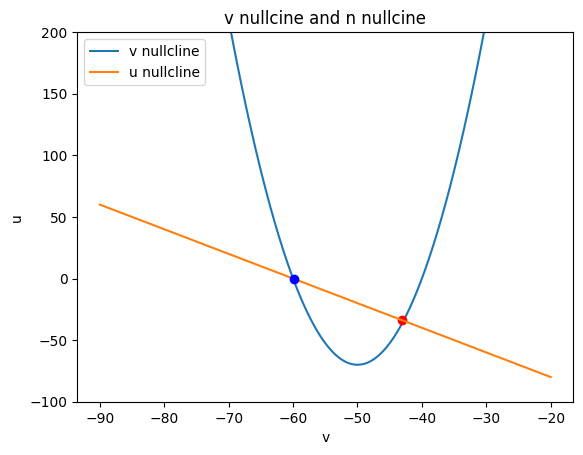

In [9]:
import numpy as np
import matplotlib.pyplot as plt

I = 0
v = np.linspace(-90, -20, 10000)
v_null = I + k*(v - vr)*(v - vt)
u_null = b*(v-vr)
v_eq1 = (k*vt + k*vr + b + np.sqrt((vr-vt)**2 * k**2 + (-2*vr*b+2*b*vt-4*I)*k + b))/(2*k)
u_eq1 = b*(v_eq1 - vr)
v_eq2 = (k*vt + k*vr + b - np.sqrt((vr-vt)**2 * k**2 + (-2*vr*b+2*b*vt-4*I)*k + b))/(2*k)
u_eq2 = b*(v_eq2 - vr)

plt.figure()
plt.plot(v, v_null, label = 'v nullcline')
plt.plot(v_eq1, u_eq1, 'ro')
plt.plot(v, u_null, label = 'u nullcline')
plt.plot(v_eq2, u_eq2, 'bo')
plt.title('v nullcine and n nullcine')
plt.ylim(-100, 200)
plt.xlabel('v')
plt.ylabel('u')
plt.legend(loc="upper left")
plt.show()

$\textbf{Hypothesis:}$ From the plot of the nullcline, we see that I is large enough, we will have no <br>
intersection of the nullclines, and hence no equilbrium points. This corresponds to the <br>
regular firing state, and a bifurcation occurs. More specifically, a saddle-node bifurcation, <br>
and the neuron will be an integrator, which does not exhibit subthreshold oscillation. 

In the following code, we compute the equilbrium point by assuming I is a constant current.

In addition, we can see that our assumption of ignoring the condition for $v \geq v_{\text{peak}}$ is<br>
reasonable as the regular spiking behavior will occur when we have sufficiently high current I injected<br>
and the post peak condition does not depend on b or I.

The equilbrium points can be found from the v-nullcline and n-nullcline and use the quadratic formula,<br>
which results the following, 
\begin{align*}
v_{\text{eq}} &= \frac{kv_t + kv_r + b \pm \sqrt{(v_r - v_t)^2 k^2 + (-2v_rb + 2bv_t -4I)k + b^2}}{2k}\\
u_{\text{eq}} &= b (v_{\text{eq}} - v_r)
\end{align*}
After substituting all parameters values except for the bifurcation parameter, I and b, we have
\begin{align*}
v_{\text{eq1}} &= -50 + 0.71429b + 0.71429\sqrt{196 - 2.8 I + 29b}\\
u_{\text{eq1}} &= b(-10 + 0.71429b - 0.71429\sqrt{196 - 2.8 I + 29b})\\
v_{\text{eq2}} &= -50 + 0.71429b - 0.71429\sqrt{196 - 2.8 I + 29b}\\
u_{\text{eq2}} &= b(-10 + 0.71429b - 0.71429\sqrt{196 - 2.8 I + 29b}\\
\end{align*}

It is clear that when $I = \frac{196 + 29b}{2.8}$ the two equilbrium will collide, and their value will be 
$$v_{\text{eq}} = -50 + 0.71429b, u_{\text{eq}} = b(-10 + 0.71429b)$$


Furtheremore, let $f = \dfrac{k(v^2-(v_t+v_r)v+v_tv_r) - u + I}{C}, g = a(b(v-v_r)-u)$, then the<br>
Jacobian of the system is
\begin{equation}
J=
\begin{bmatrix}
\dfrac{k(2v-v_t-v_r)}{C} & \dfrac{-1}{C} \\
ab & -a \\
\end{bmatrix}
\end{equation}
then, the Jacobian at $(v_{\text{eq}}, u_{\text{eq}})$
\begin{equation}
J_{\text{eq}} =
\begin{bmatrix}
0.01b & \dfrac{-1}{100} \\
0.03b & -0.03\\
\end{bmatrix}
\end{equation}

The determinant of the Jacobian is at $(v_{\text{eq1}}, u_{\text{eq1}})$ is 
\begin{equation}
\lambda^2 + (0.01b - 0.03)\lambda 
\end{equation}
and we solve for its eigenvalue would result in the following two values
\begin{align*}
\text{eq1} &= 0\\
\text{eq2} &= 0.01b - 0.03\\
\end{align*}
then it is clear that when b = 3, $\text{eq1} = \text{eq2} = 0$<br>
In addition, the tr(L) = $0.01\times 3 - 0.03 = 0$, and det(L) = $-(0.03)(0.03) + (0.01)(0.09) = -(0.03)(0.03) + (0.03)(0.03) = 0$  

### Actually, 
we should also take into the parameter a, while keeping C as a constant, I should be treated as a consant rather than a bifurctaion parameter, or it can be treated as a bifurcation parameter, I think a large enough I will give us the nescessary condition for saddle node bifurcation and hopf bifurcation, but really, it should depend on the parameter C, a, and b

Again, we have $v_{\text{eq}} = -50 + 0.71429b, u_{\text{eq}} = b(-10 + 0.71429b)$ and the Jacobian at $(v_{\text{eq}}, u_{\text{eq}})$ is 
\begin{equation}
J_{\text{eq}} = 
\begin{bmatrix}
\dfrac{b}{C} & -\dfrac{1}{C}\\
ab & -a\\
\end{bmatrix}
\end{equation}
Then the eigenvalue at these two points are 
$$\lambda_1 = 0, \lambda_2 = -\frac{Ca - b}{C}$$
which makes sense since we are already at the saddle node bifurcation condition(two equilibrium points collide), so we will always have 1 zero eigenvalue. Then $\lambda_2 = 0 \iff b = Ca$.<br>
Note: b = Ca = $100\times0.03$= 3, which is consistent with our previous results

<span style="font-size:3em;">Bogdanov and Takens Condition:</span>

Hence, from the above analysis, we see that when $(I_{\text{BT}}, b_{\text{BT}}) = (\frac{196 + 29b}{2.8}, Ca)$<br>
The Jacobian matirx has zero eigenvalues. By definition of Bogdanov-Takens from "Dynamical Systems in Neuroscience", <br>
we have a Andronov-Hopf and saddle-node bifurcation happening at the same place, that is, a Bagdanov-Takens.

# Saddle-Node Bifurcation and Hopf Bifucation:

# Hopf Bifurcation:

Again, we use the Jacobian
$$
J_{\text{eq}} = 
\begin{bmatrix}
\frac{k(2v - v_t - v_r)}{C} & \frac{-1}{C} \\
ab & -a \\
\end{bmatrix}
$$
now, their eigenvalue is of the form 
\begin{align*}
\lambda_1 &= -\frac{Ca - 2kv_{\text{eq}} + k(v_r + v_t) - \sqrt{C^2a^2 + 4Cakv_{\text{eq}} - 2Cakv_r - 2Cakv_t + 4k^2v_{\text{eq}}^2 - 4k^2v_{\text{eq}}v_r - 4k^2v_{\text{eq}}v_t + k^2v_r^2 + 2k^2v_rv_t + k^2v_t^2 - 4Cab}}{2C} \\
\lambda_2 &= -\frac{Ca - 2kv_{\text{eq}} + k(v_r + v_t) + \sqrt{C^2a^2 + 4Cakv_{\text{eq}} - 2Cakv_r - 2Cakv_t + 4k^2v_{\text{eq}}^2 - 4k^2v_{\text{eq}}v_r - 4k^2v_{\text{eq}}v_t + k^2v_r^2 + 2k^2v_rv_t + k^2v_t^2 - 4Cab}}{2C} \\
\end{align*}
Since at Hopf Bifurcation, we will have two eigenvalue with pureply imaginery part, and $v_{\text{eq}}$ is in front of the radicand, we can let
$$v_{\text{eq}} = \dfrac{Ca - k(v_r + v_t)}{2k}$$
to make the terms in front of the radicand to be zero, then at $v_{\text{eq}}$, we have the eigenvalues are 
\begin{equation}
\lambda_{\text{hopf1}} = \frac{\sqrt{Ca(Ca - b)}}{C}, \lambda_{\text{hopf2}} = -\frac{\sqrt{Ca(Ca - b)}}{C}
\end{equation}
then it is clear to see that when $Ca < b$, the terms inside the radical becomes negative. Moreover, C is the capacitance of the cell membrane, so it is alway positive, and a is the time scale of the recovery variable, so it is also postive since one does not scale the time negatively.
Therefore, when $Ca < b$, we will have Hopf bifurcation at $v_{\text{eq}} = \frac{Ca - k(v_r + v_t)}{2k}$. To achieve this equilibrium, we can set it equal to the general equilibrium equation 
$$
\frac{Ca + k(v_t + v_r)}{2k} = \frac{k(v_t + v_r) \pm \sqrt{(v_t - v_t)^2 k^2 + k(-2v_r b + 2bv_t - 4I) + b}}{2k}
$$
$$
Ca - b = \pm \sqrt{(v_r - v_t)^2k^2 + k(2bv_t - 2bv_r - 4I) + b}
$$

Note that we already said $Ca - b < 0$, so that means we have to choose negative sign on the right hand side, otherwise, it does not make sense for a square root to equal to a negative sign. 
\begin{aligned}
(b - Ca)^2 &= (v_r-v_t)^2k^2 + k(2bv_t -2bv_r - 4I) + b \\
\frac{(b - Ca)^2 - (v_r - v_t)^2k^2 - b}{k} &= 2bv_t - 2bv_r - 4I \\
4I &= 2bv_t - 2bv_r - \frac{(b - Ca)^2 - (v_r - v_t)^2k^2 - b}{k} \\
I &= \frac{2bk(v_t - v_r) +(v_r - v_t)^2k^2 + b - (b-Ca)^2}{4k}
\end{aligned}
$$$$

Therefore, we have the Hopf condition when $Ca < b$.

# Saddle-Node Bifurcation

Again, we make use of the general form of eigenvalue, which is
\begin{align*}
\lambda_1 &= -\frac{Ca - 2kv_{\text{eq}} + k(v_r + v_t) - \sqrt{C^2a^2 + 4Cakv_{\text{eq}} - 2Cakv_r - 2Cakv_t + 4k^2v_{\text{eq}}^2 - 4k^2v_{\text{eq}}v_r - 4k^2v_{\text{eq}}v_t + k^2v_r^2 + 2k^2v_rv_t + k^2v_t^2 - 4Cab}}{2C} \\
\lambda_2 &= -\frac{Ca - 2kv_{\text{eq}} + k(v_r + v_t) + \sqrt{C^2a^2 + 4Cakv_{\text{eq}} - 2Cakv_r - 2Cakv_t + 4k^2v_{\text{eq}}^2 - 4k^2v_{\text{eq}}v_r - 4k^2v_{\text{eq}}v_t + k^2v_r^2 + 2k^2v_rv_t + k^2v_t^2 - 4Cab}}{2C} \\
\end{align*}
We could solve one of the eigenvalues to be zero, since one has a plus sign in front of the radicand, and the other has a minus sign in front of the radicand, then only one of them will be zero since value of the square root can never be negative. Nevertheless, we will ignore that and proceed to solve
\begin{aligned}
0 &= -\frac{Ca - 2kv_{\text{eq}} + k(v_r + v_t) \pm \sqrt{C^2a^2 + 4Cakv_{\text{eq}} - 2Cakv_r - 2Cakv_t + 4k^2v_{\text{eq}}^2 - 4k^2v_{\text{eq}}v_r - 4k^2v_{\text{eq}}v_t + k^2v_r^2 + 2k^2v_rv_t + k^2v_t^2 - 4Cab}}{2C} \\
2kv_{\text{eq}} - Ca - k(v_r + v_t) &= \pm \sqrt{C^2a^2 + 4Cakv_{\text{eq}} - 2Cakv_r - 2Cakv_t + 4k^2v_{\text{eq}}^2 - 4k^2v_{\text{eq}}v_r - 4k^2v_{\text{eq}}v_t + k^2v_r^2 + 2k^2v_rv_t + k^2v_t^2 - 4Cab} \\
(2kv_{\text{eq}} - Ca - k(v_r + v_t))^2 &= C^2a^2 + 4Cakv_{\text{eq}} - 2Cakv_r - 2Cakv_t + 4k^2v_{\text{eq}}^2 - 4k^2v_{\text{eq}}v_r - 4k^2v_{\text{eq}}v_t + k^2v_r^2 + 2k^2v_rv_t + k^2v_t^2 - 4Cab \\
(4v^2 - 4vv_r - 4vv_t + v_r^2 + 2v_rv_t + v_t^2)k^2 + (-4Cav + 2Cav_r + 2Cav_t)k + C^2a^2 &= 4(v - v_r/2 - v_t/2)^2k^2 + 4(v - v_r/2 - v_t/2)aCk + Ca(Ca - 4b) \\
4(v - v_r/2 - v_t/2)^2k^2 + (-4Cav + 2Cav_r + 2Cav_t)k + C^2a^2 &= 4(v - v_r/2 - v_t/2)^2k^2 + 4(v - v_r/2 - v_t/2)aCk + Ca(Ca - 4b) \\
-4Cakv + 2Cav_rk + 2Cav_tk + C^2a^2 = 4vaCk - 2v_raCk - 2v_taCk + C^2a^2 - Ca4b \\
4Cav_rk + 4Cav_tk + Ca4b &= 8Cakv \\
v_{\text{crit}} &= \frac{k(v_t+v_r) + b}{2k}\\
\end{aligned}

Then at $v_{\text{crit}}$, the radicand will be 
$(Ca-b)^2$
when computed in maple. Taking the square root, we will have $\lvert Ca - b \rvert$ Therefore we have 
\begin{aligned}
\lambda_1 &= -\frac{Ca - 2k\frac{k(v_r + v_t) + b}{2k} + k(v_r + v_t) - \lvert Ca - b \rvert}{2C} \\
\lambda_1 &= -\frac{Ca - b - \lvert Ca - b\rvert}{2C}\\
\lambda_2 &= -\frac{Ca - 2k\frac{k(v_r + v_t) + b}{2k} + k(v_r + v_t) + \lvert Ca - b \rvert}{2C} \\
\lambda_2 &= -\frac{Ca - b + \lvert Ca - b \rvert}{2C} \\
\end{aligned}

If $Ca - b > 0$, then 
$$
\lambda_1 = 0, \lambda_2 = - \frac{(Ca - b)}{C}
$$
If $Ca - b < 0$, then 
$$
\lambda_1 = -\frac{Ca - b}{C}, \lambda_2 = 0
$$
So both condition seems to work. 

However, note that when we derived the conditions for the Bogdanov-Takens condition, we had $\lambda_1 = 0, \lambda_2 = -\frac{Ca - b}{C}$. Therefore, we need to be consistent and choose and first condition, which is $Ca - b > 0 \Rightarrow b < Ca$. Therefore, when $b < Ca$, we will have saddle node bifurcation.

# Conclusion:
1. $b = Ca \textbf{ Bogdanov Takens}$
2. $b < Ca \textbf{ Saddle Node Bifurcation}$
3. $b > Ca \textbf{ Andronov-Hopf Bifurcation}$
This is consistent with the result found in the paper [Simple Model of Spiking Neurons](https://www.izhikevich.org/publications/nesb.pdf) by Eugene M. Izhikevich, the author, as I quote here "The case b < a(b > a) corresponds
to saddle-node (Andronov–Hopf) bifurcation of the resting state".

# we plot the nullclines to study what happens at $I_{\text{BT}}, b_{\text{BT}}$

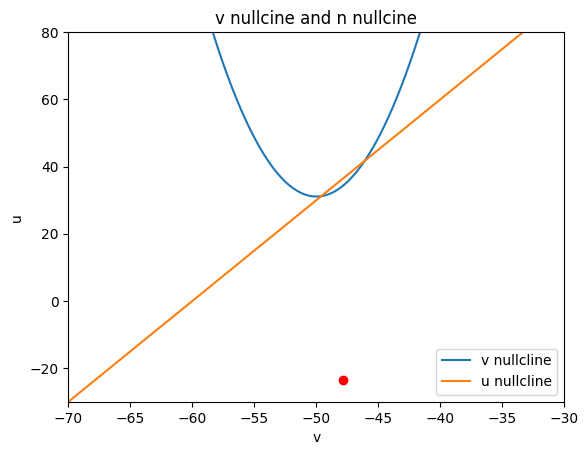

In [10]:
C = 100
k = 0.7
vr = -60
vt = -40
a = 0.03 
b = 3
c = -50
d = 100
vpeak = 35
I = (196 + 29*b)/2.8

v = np.linspace(-90, -20, 10000)
v_null = I + k*(v - vr)*(v - vt)
u_null = b*(v-vr)

v_eq = -50 + 0.71429*b
u_eq = b*(-10 + 0.71429*b)

plt.figure()
plt.plot(v, v_null, label = 'v nullcline')
plt.plot(v_eq, u_eq, 'ro')
plt.plot(v, u_null, label = 'u nullcline')
plt.title('v nullcine and n nullcine')
plt.ylim(-30, 80)
plt.xlim(-70, -30)
plt.xlabel('v')
plt.ylabel('u')
plt.legend(loc="lower right")
plt.show()

For b = -2, when I = 51.42857142857143, the Equilibrium Points collide!
For b = 0, when I = 70.0, the Equilibrium Points collide!
For b = 0.5, when I = 75.08928571428572, the Equilibrium Points collide!
For b = 2.5, when I = 97.23214285714286, the Equilibrium Points collide!
For b = 3, when I = 103.21428571428572, the Equilibrium Points collide!
For b = 3.5, when I = 109.375, the Equilibrium Points collide!
For b = 5, when I = 128.92857142857144, the Equilibrium Points collide!


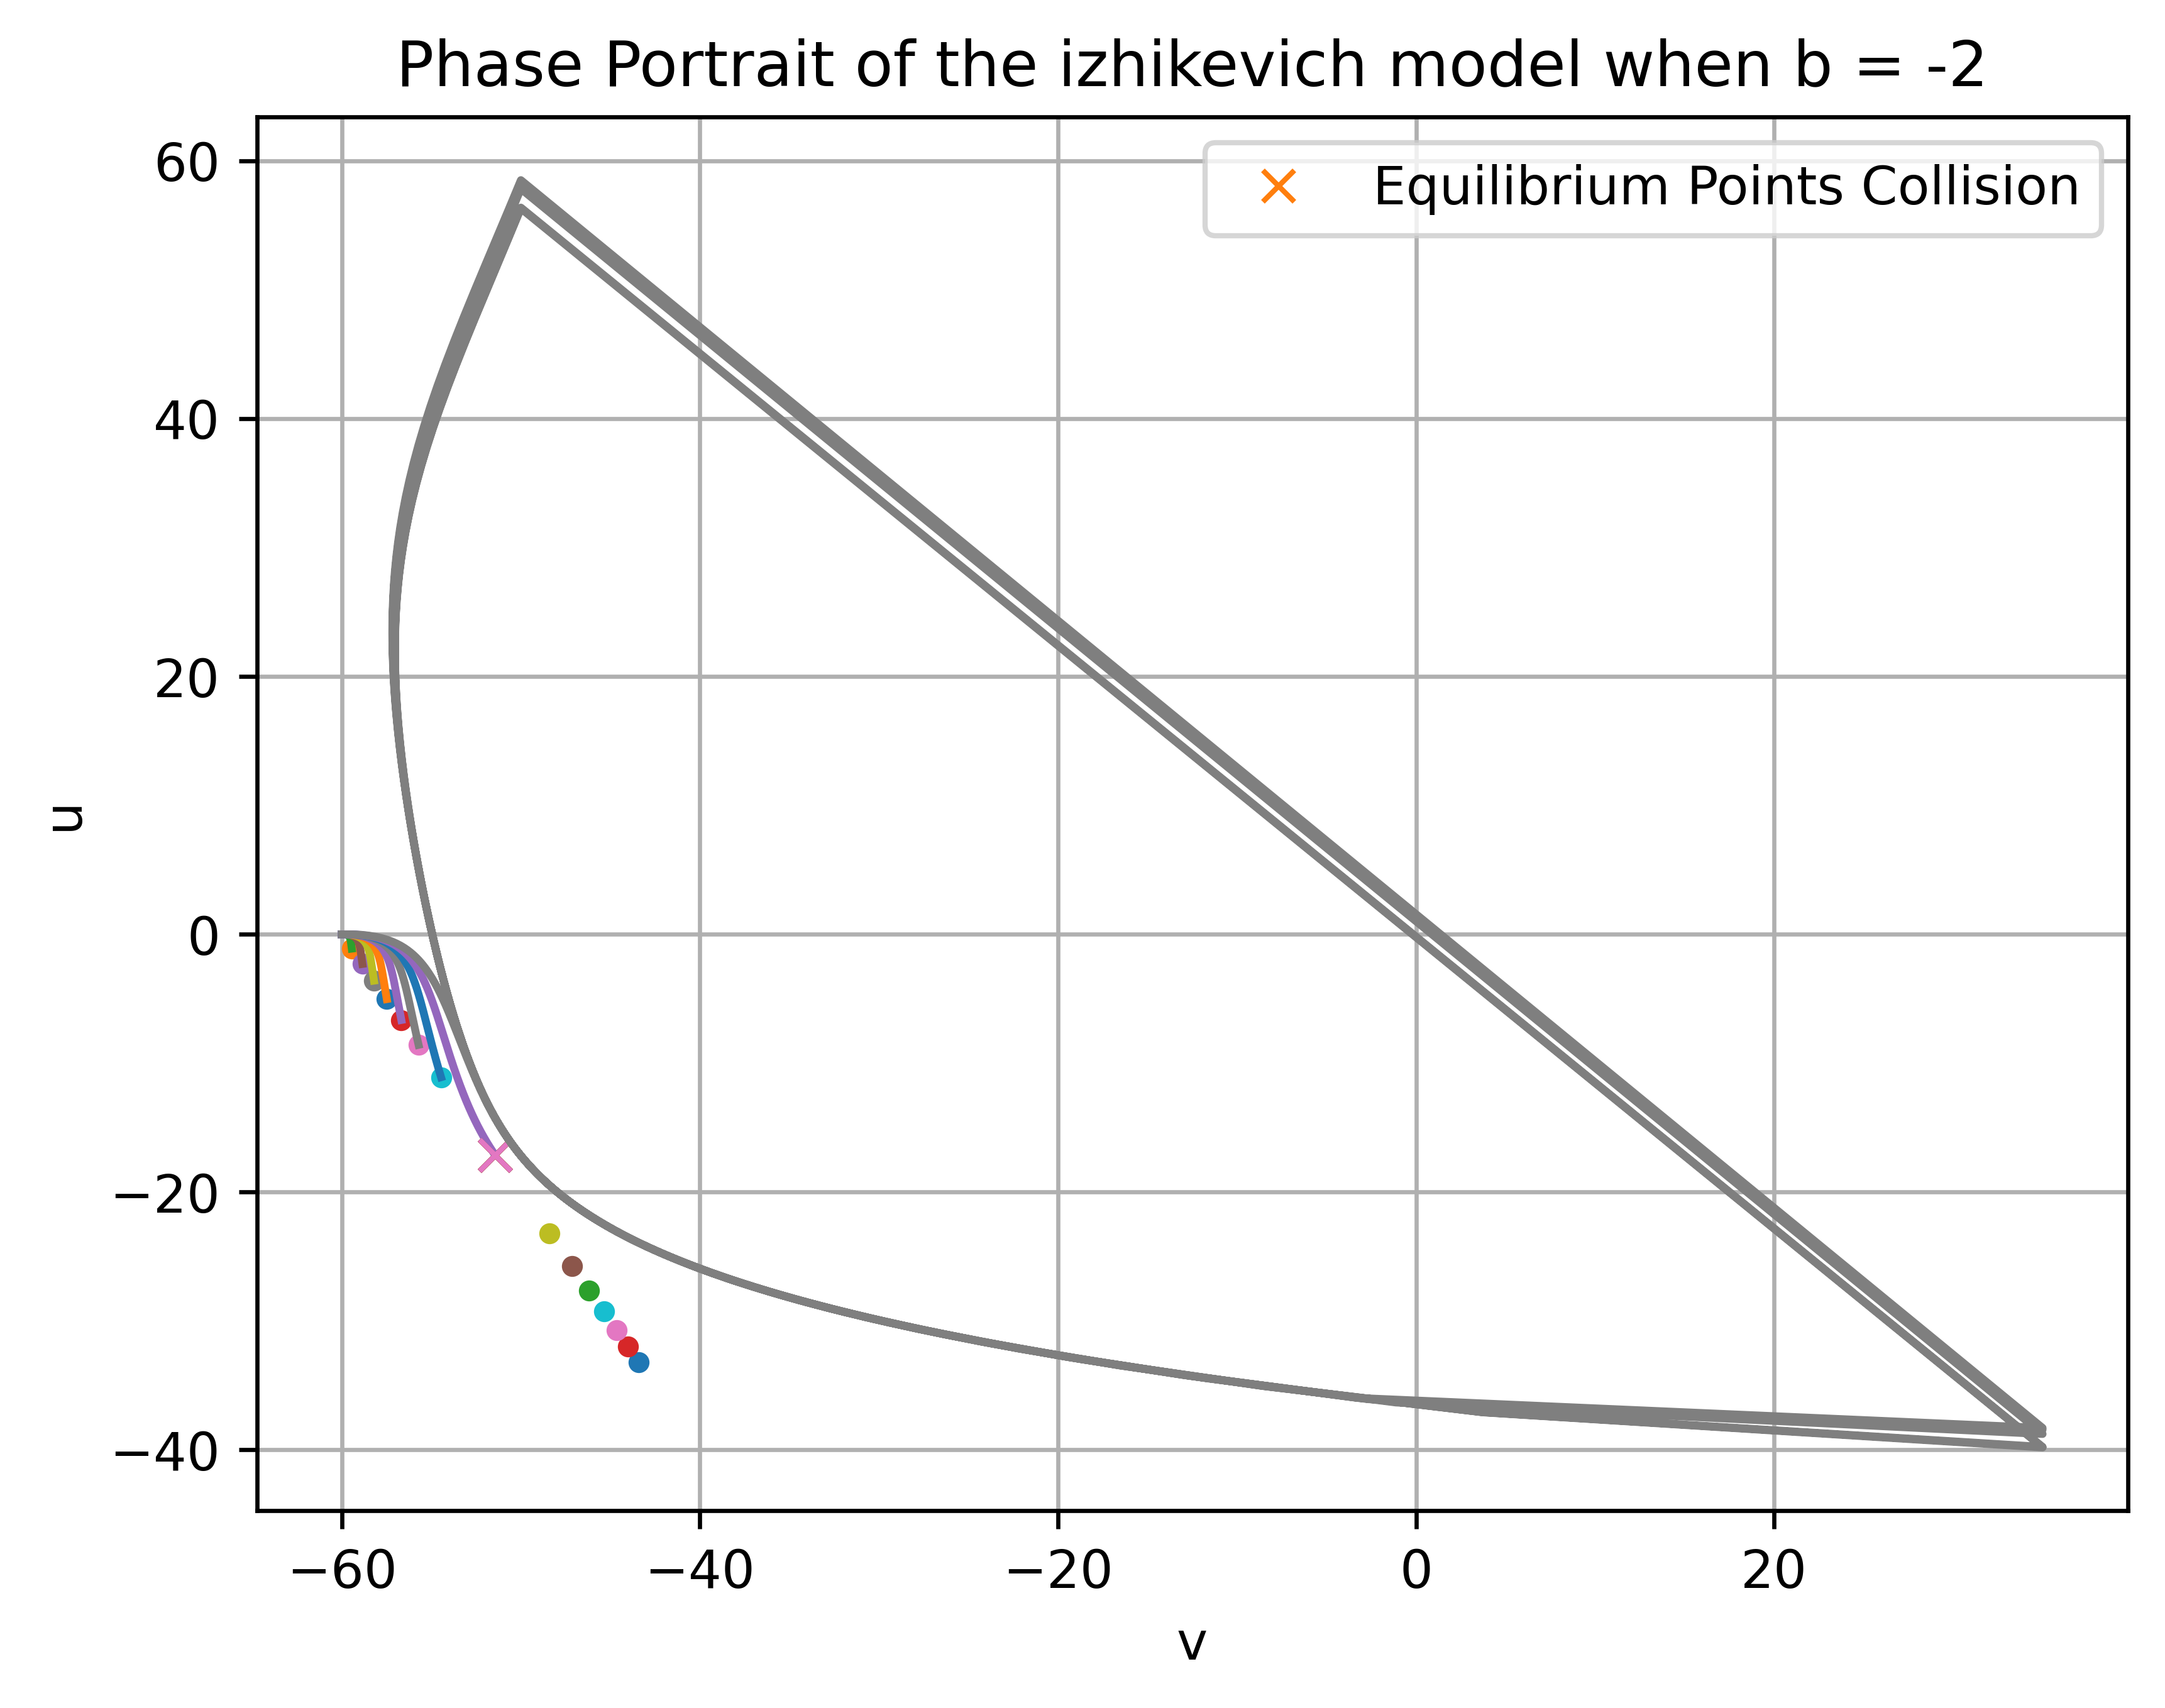

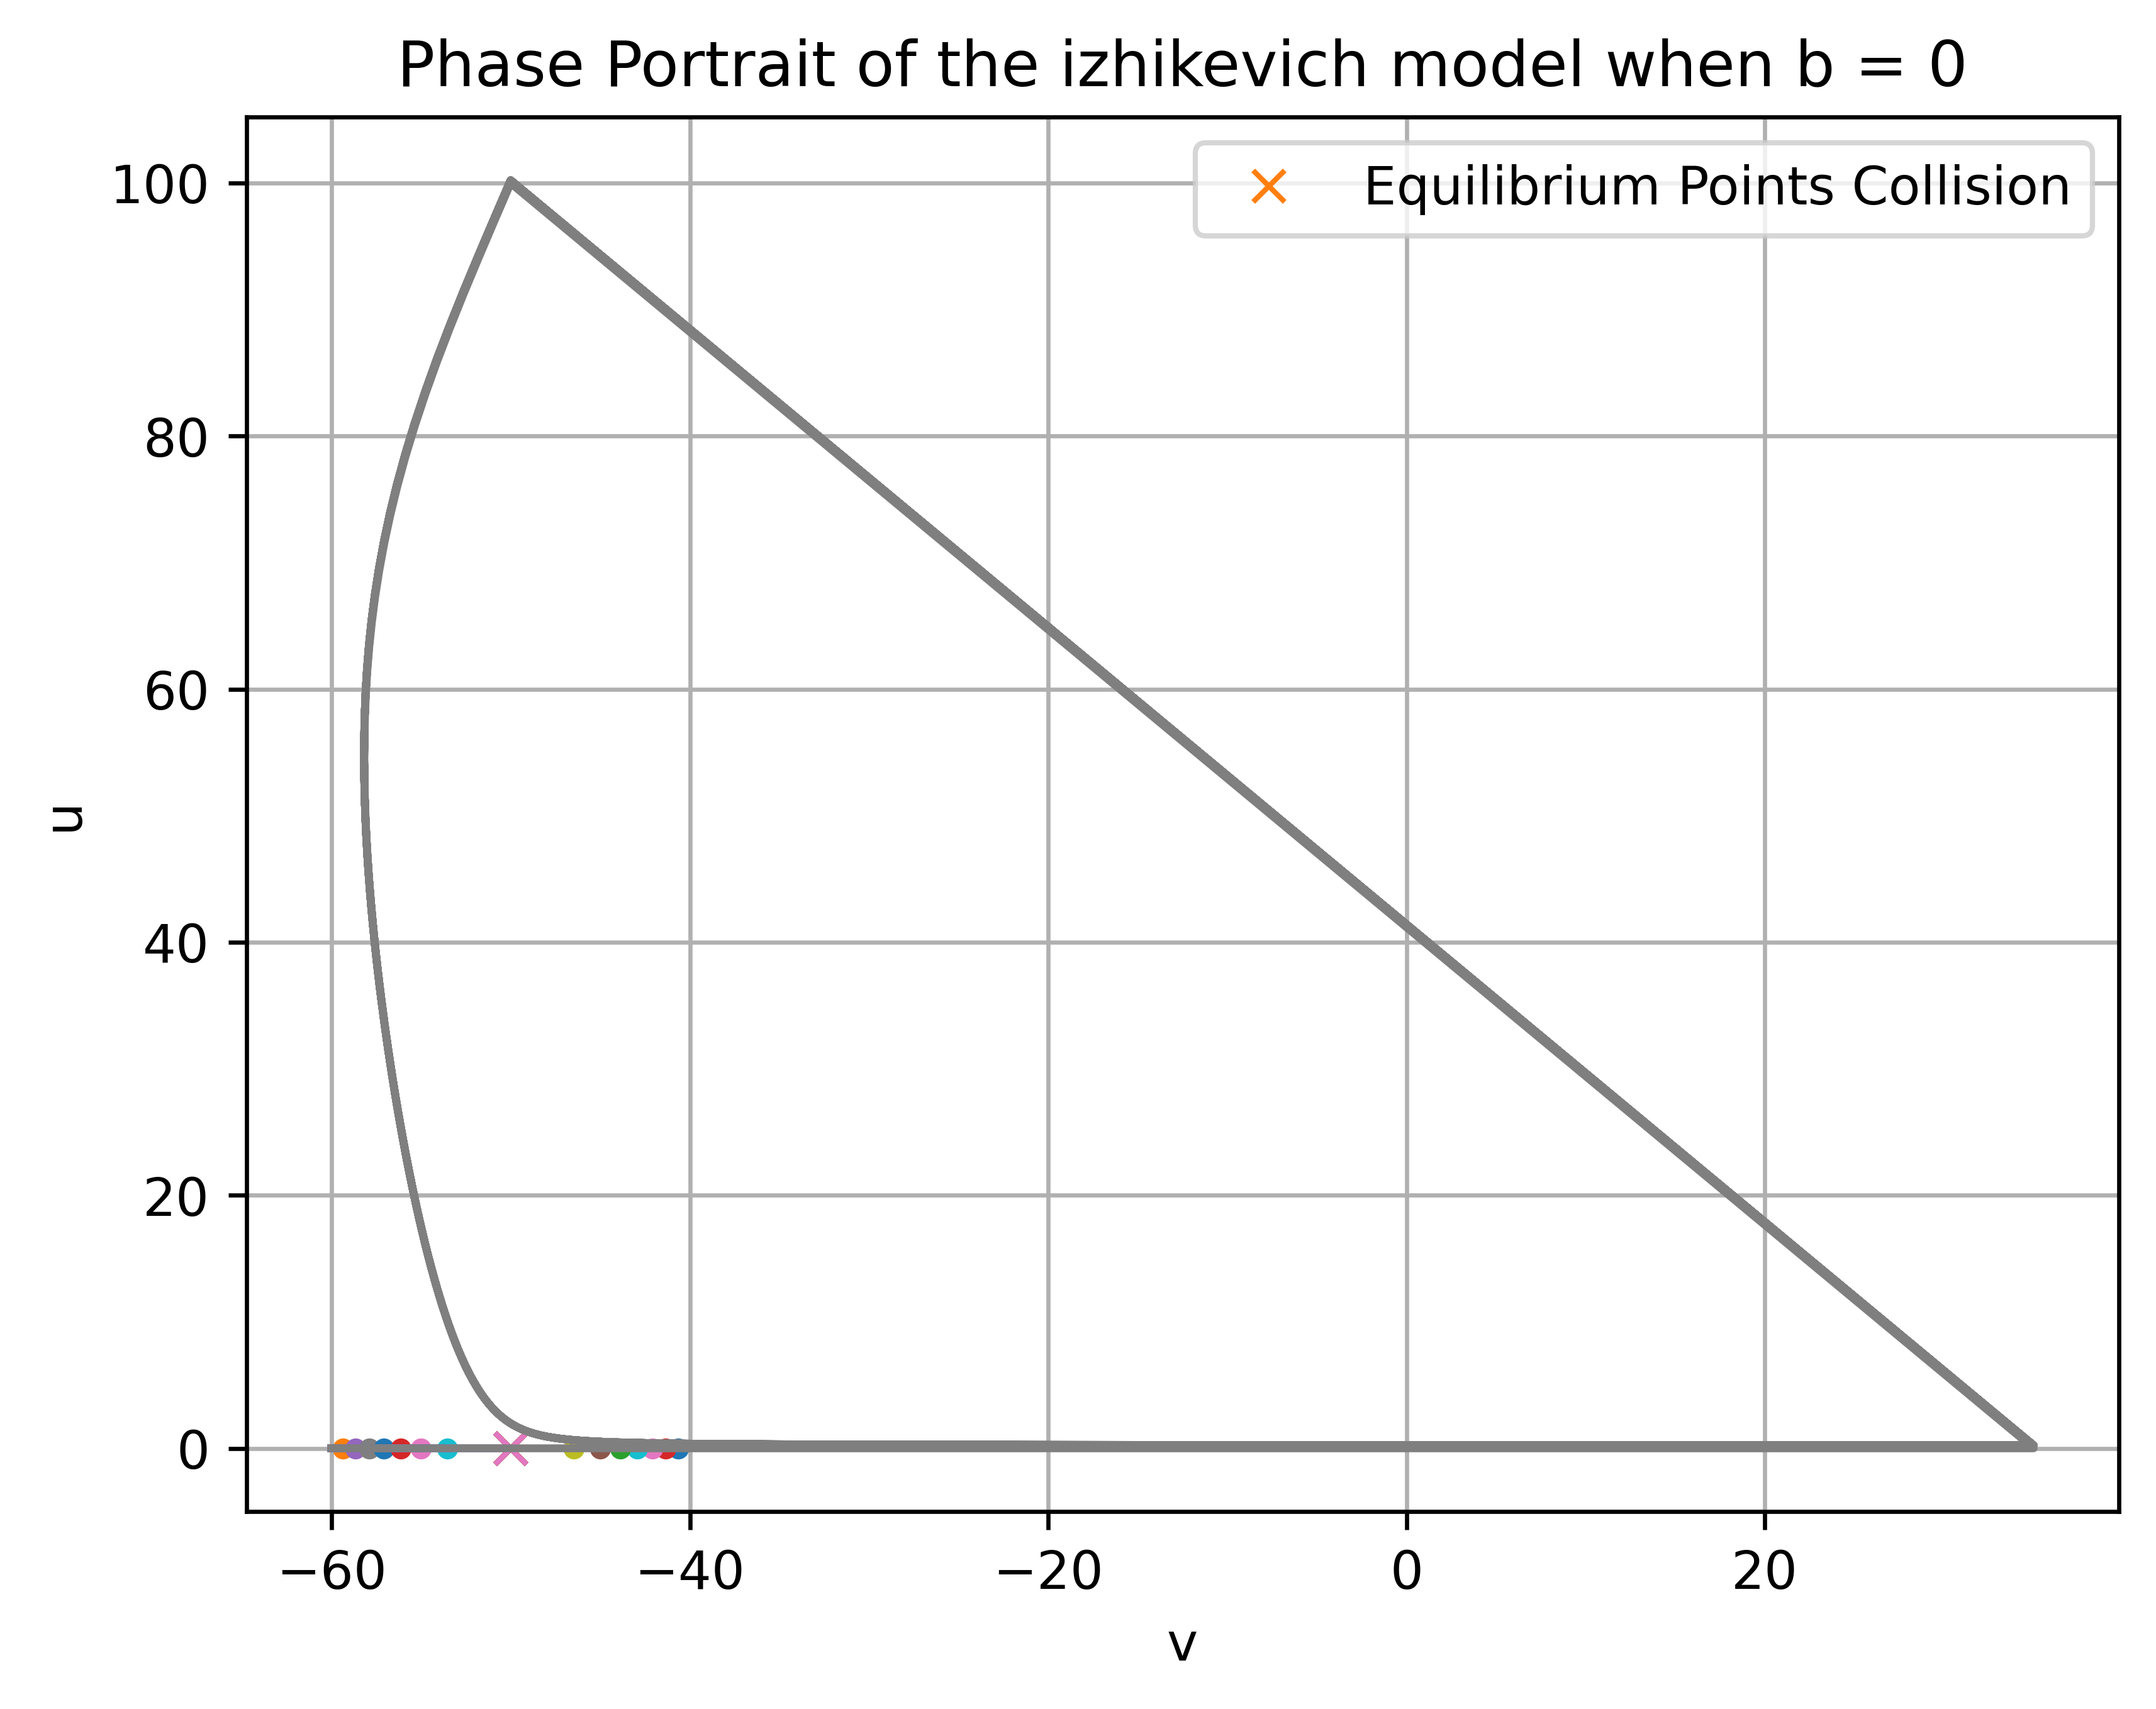

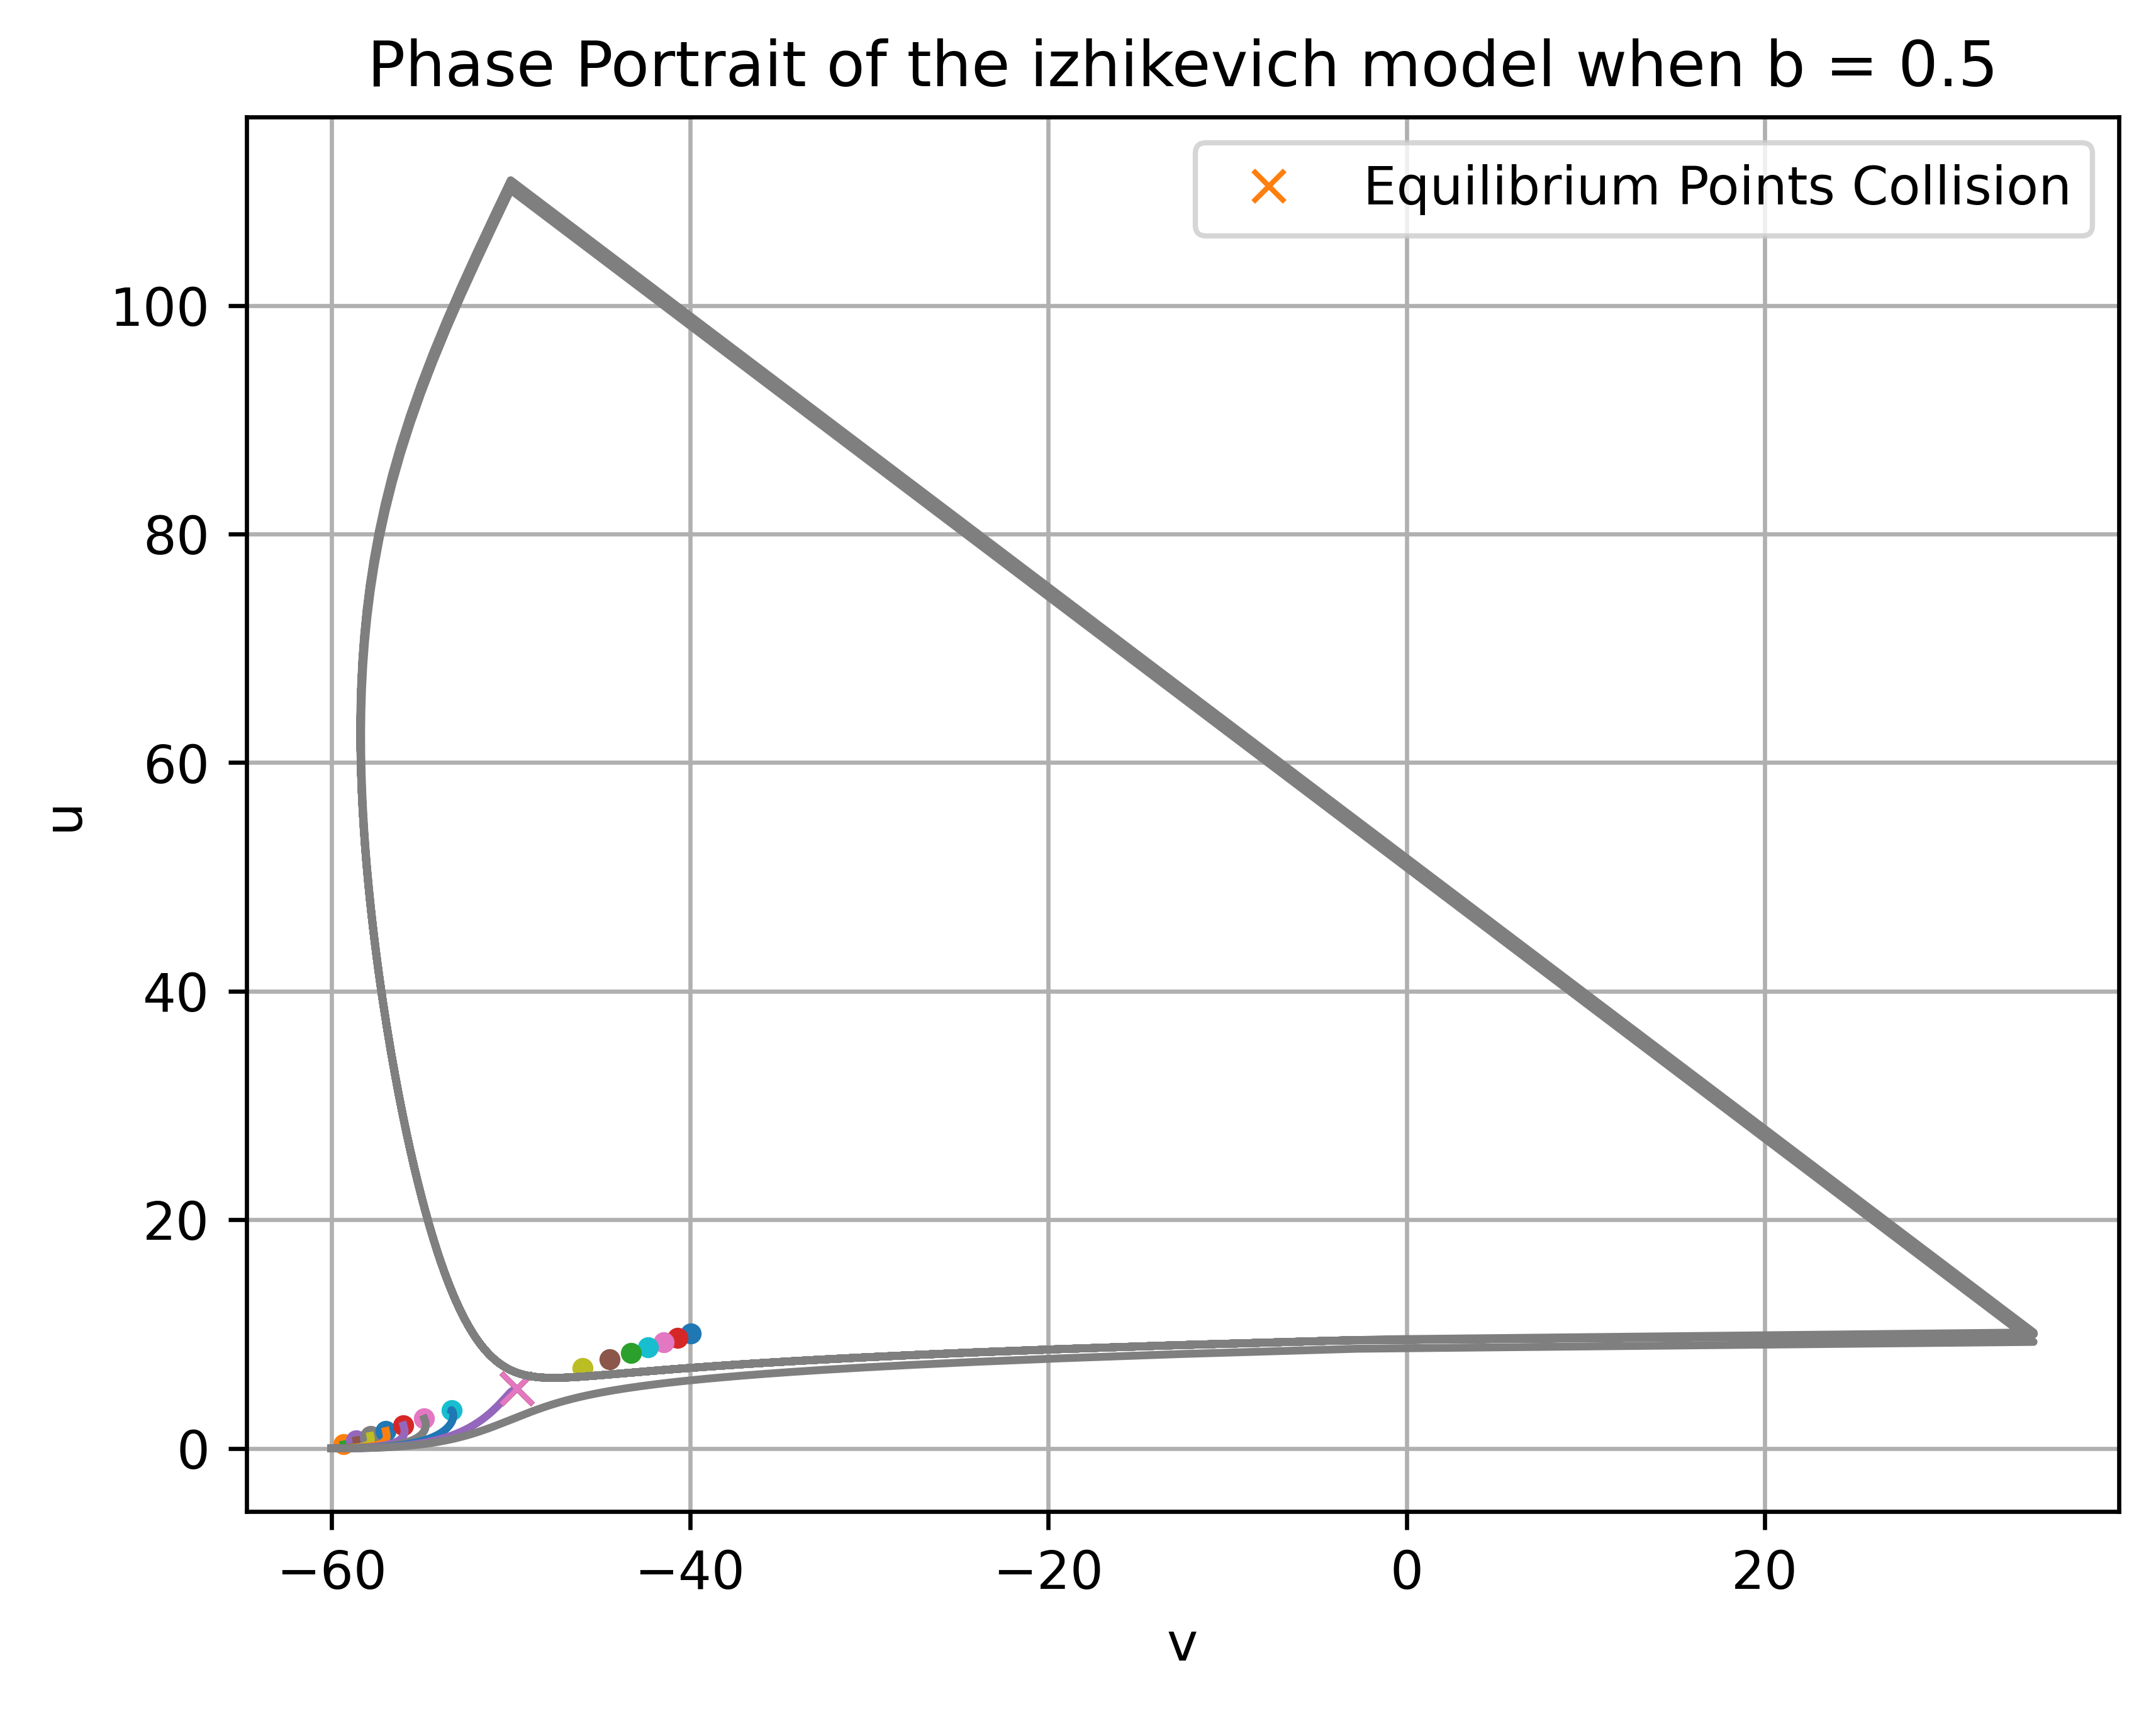

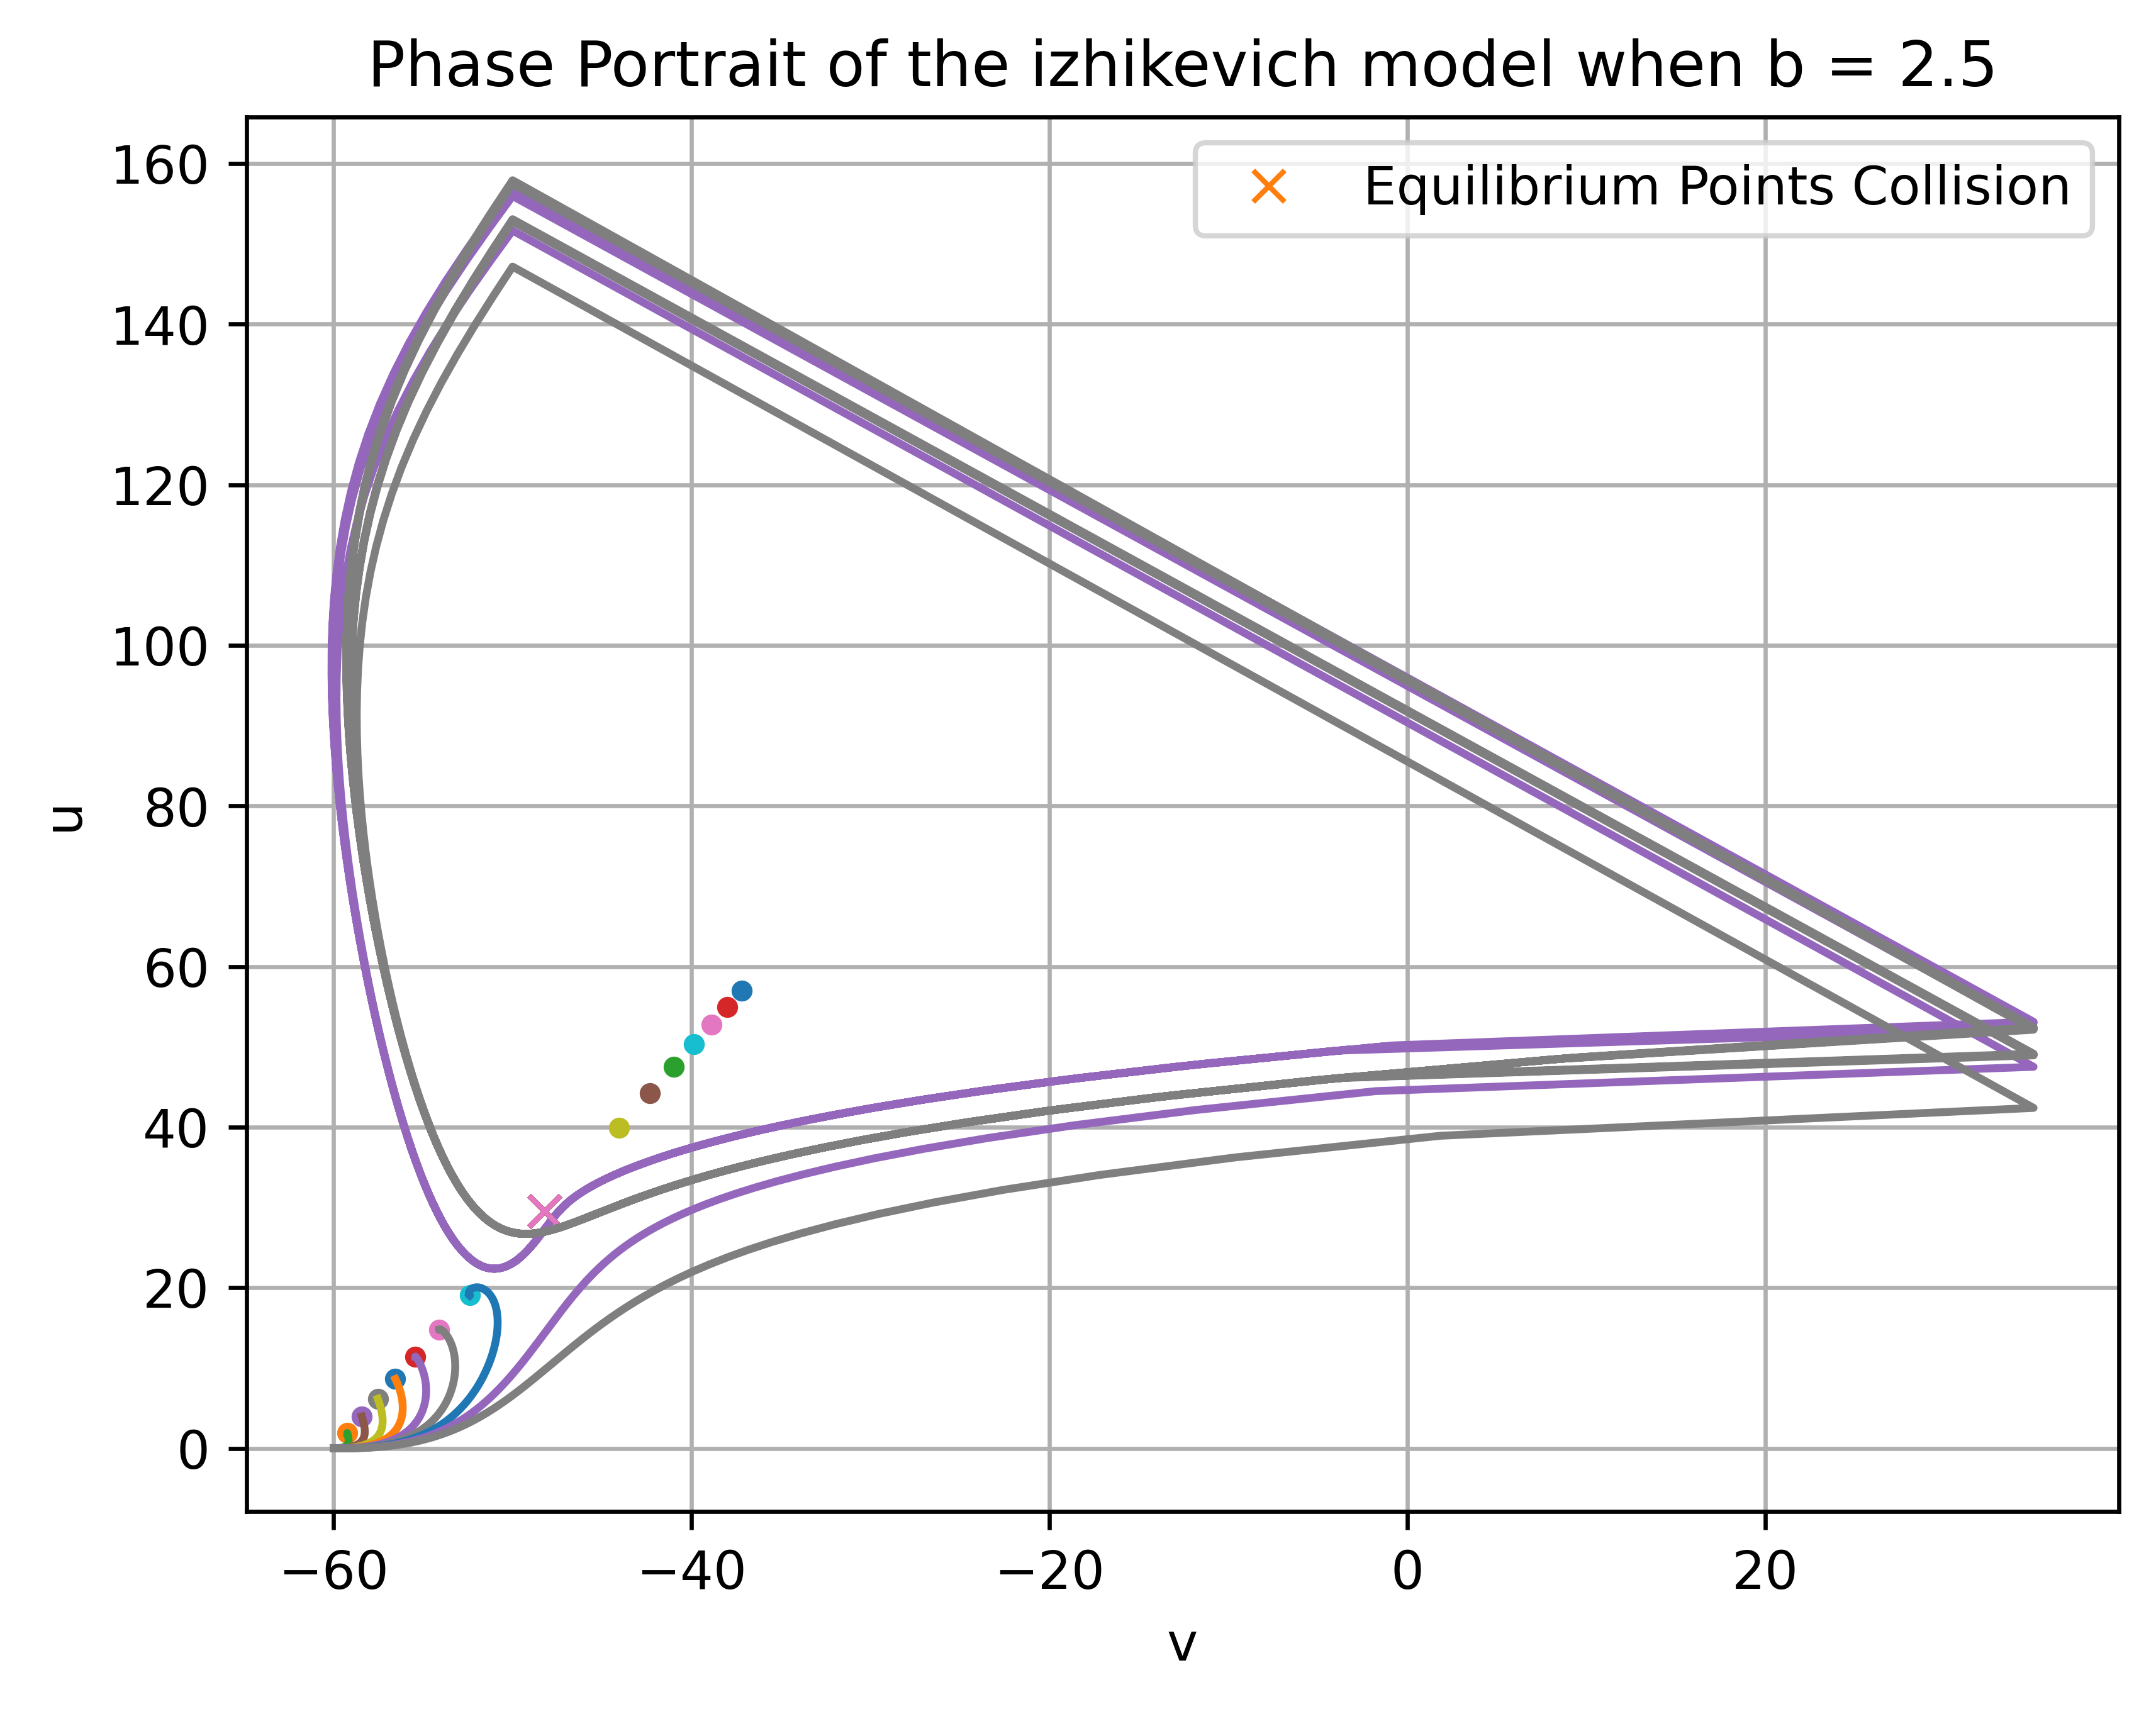

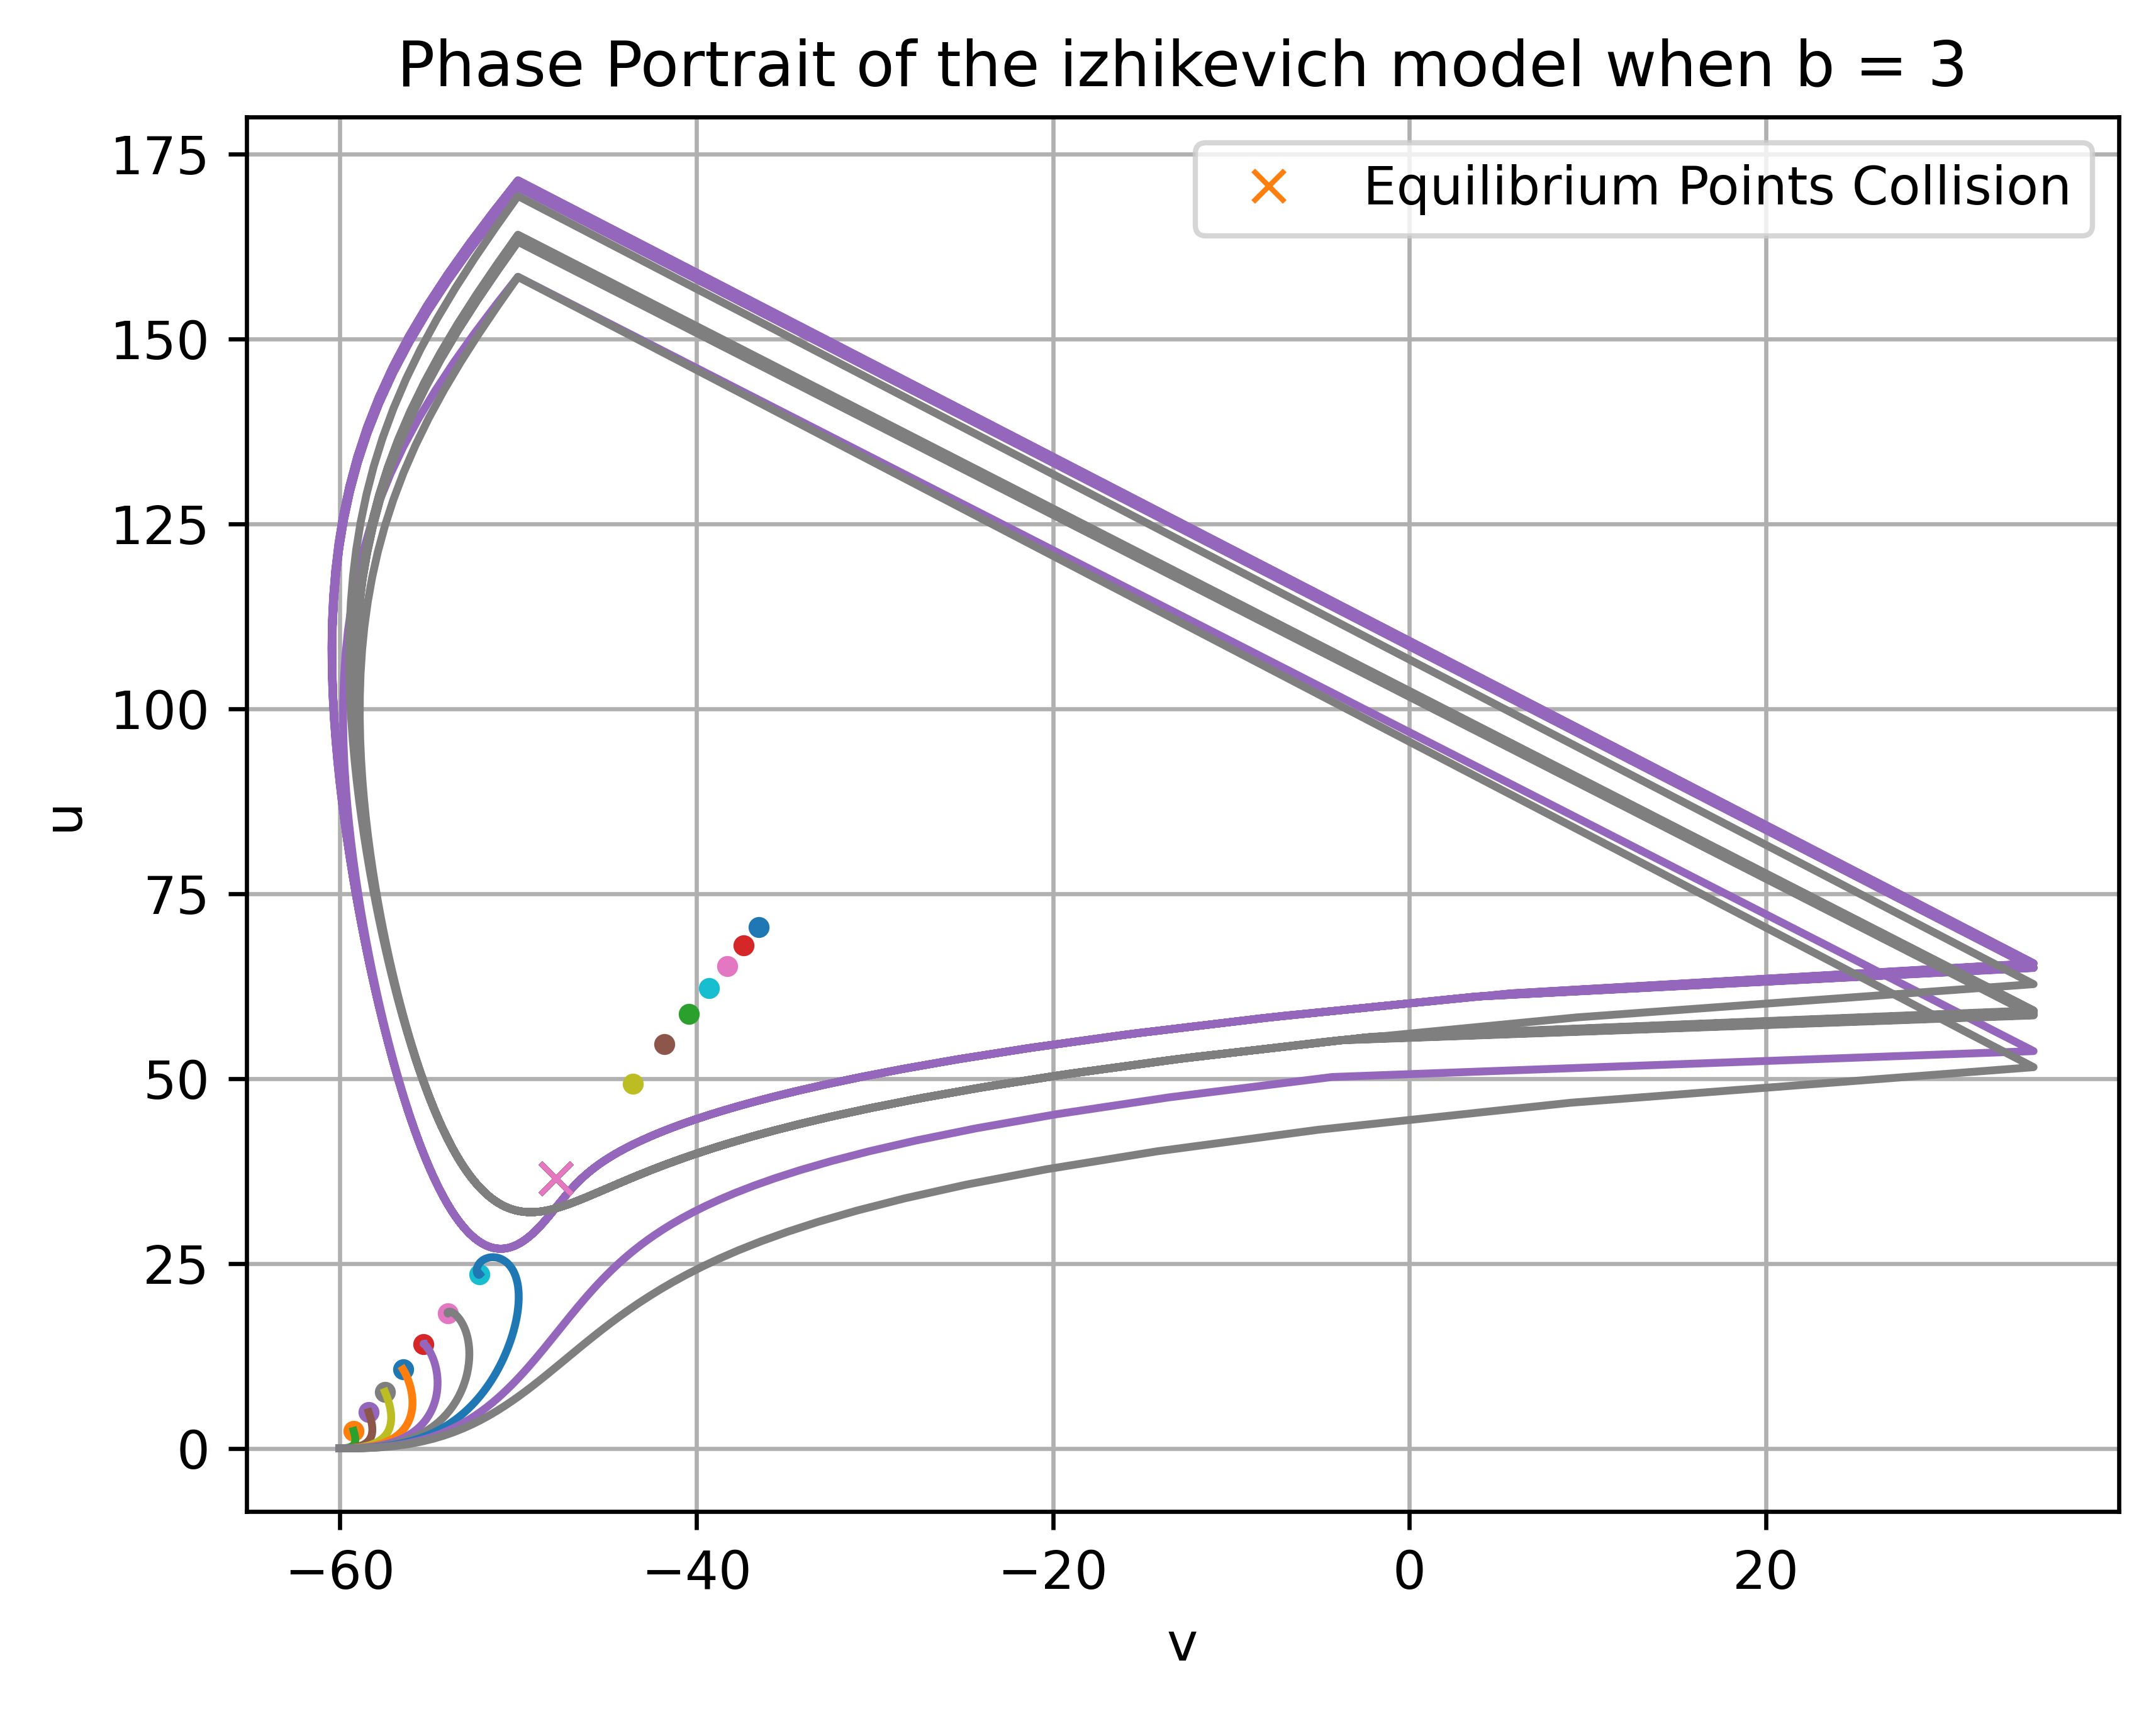

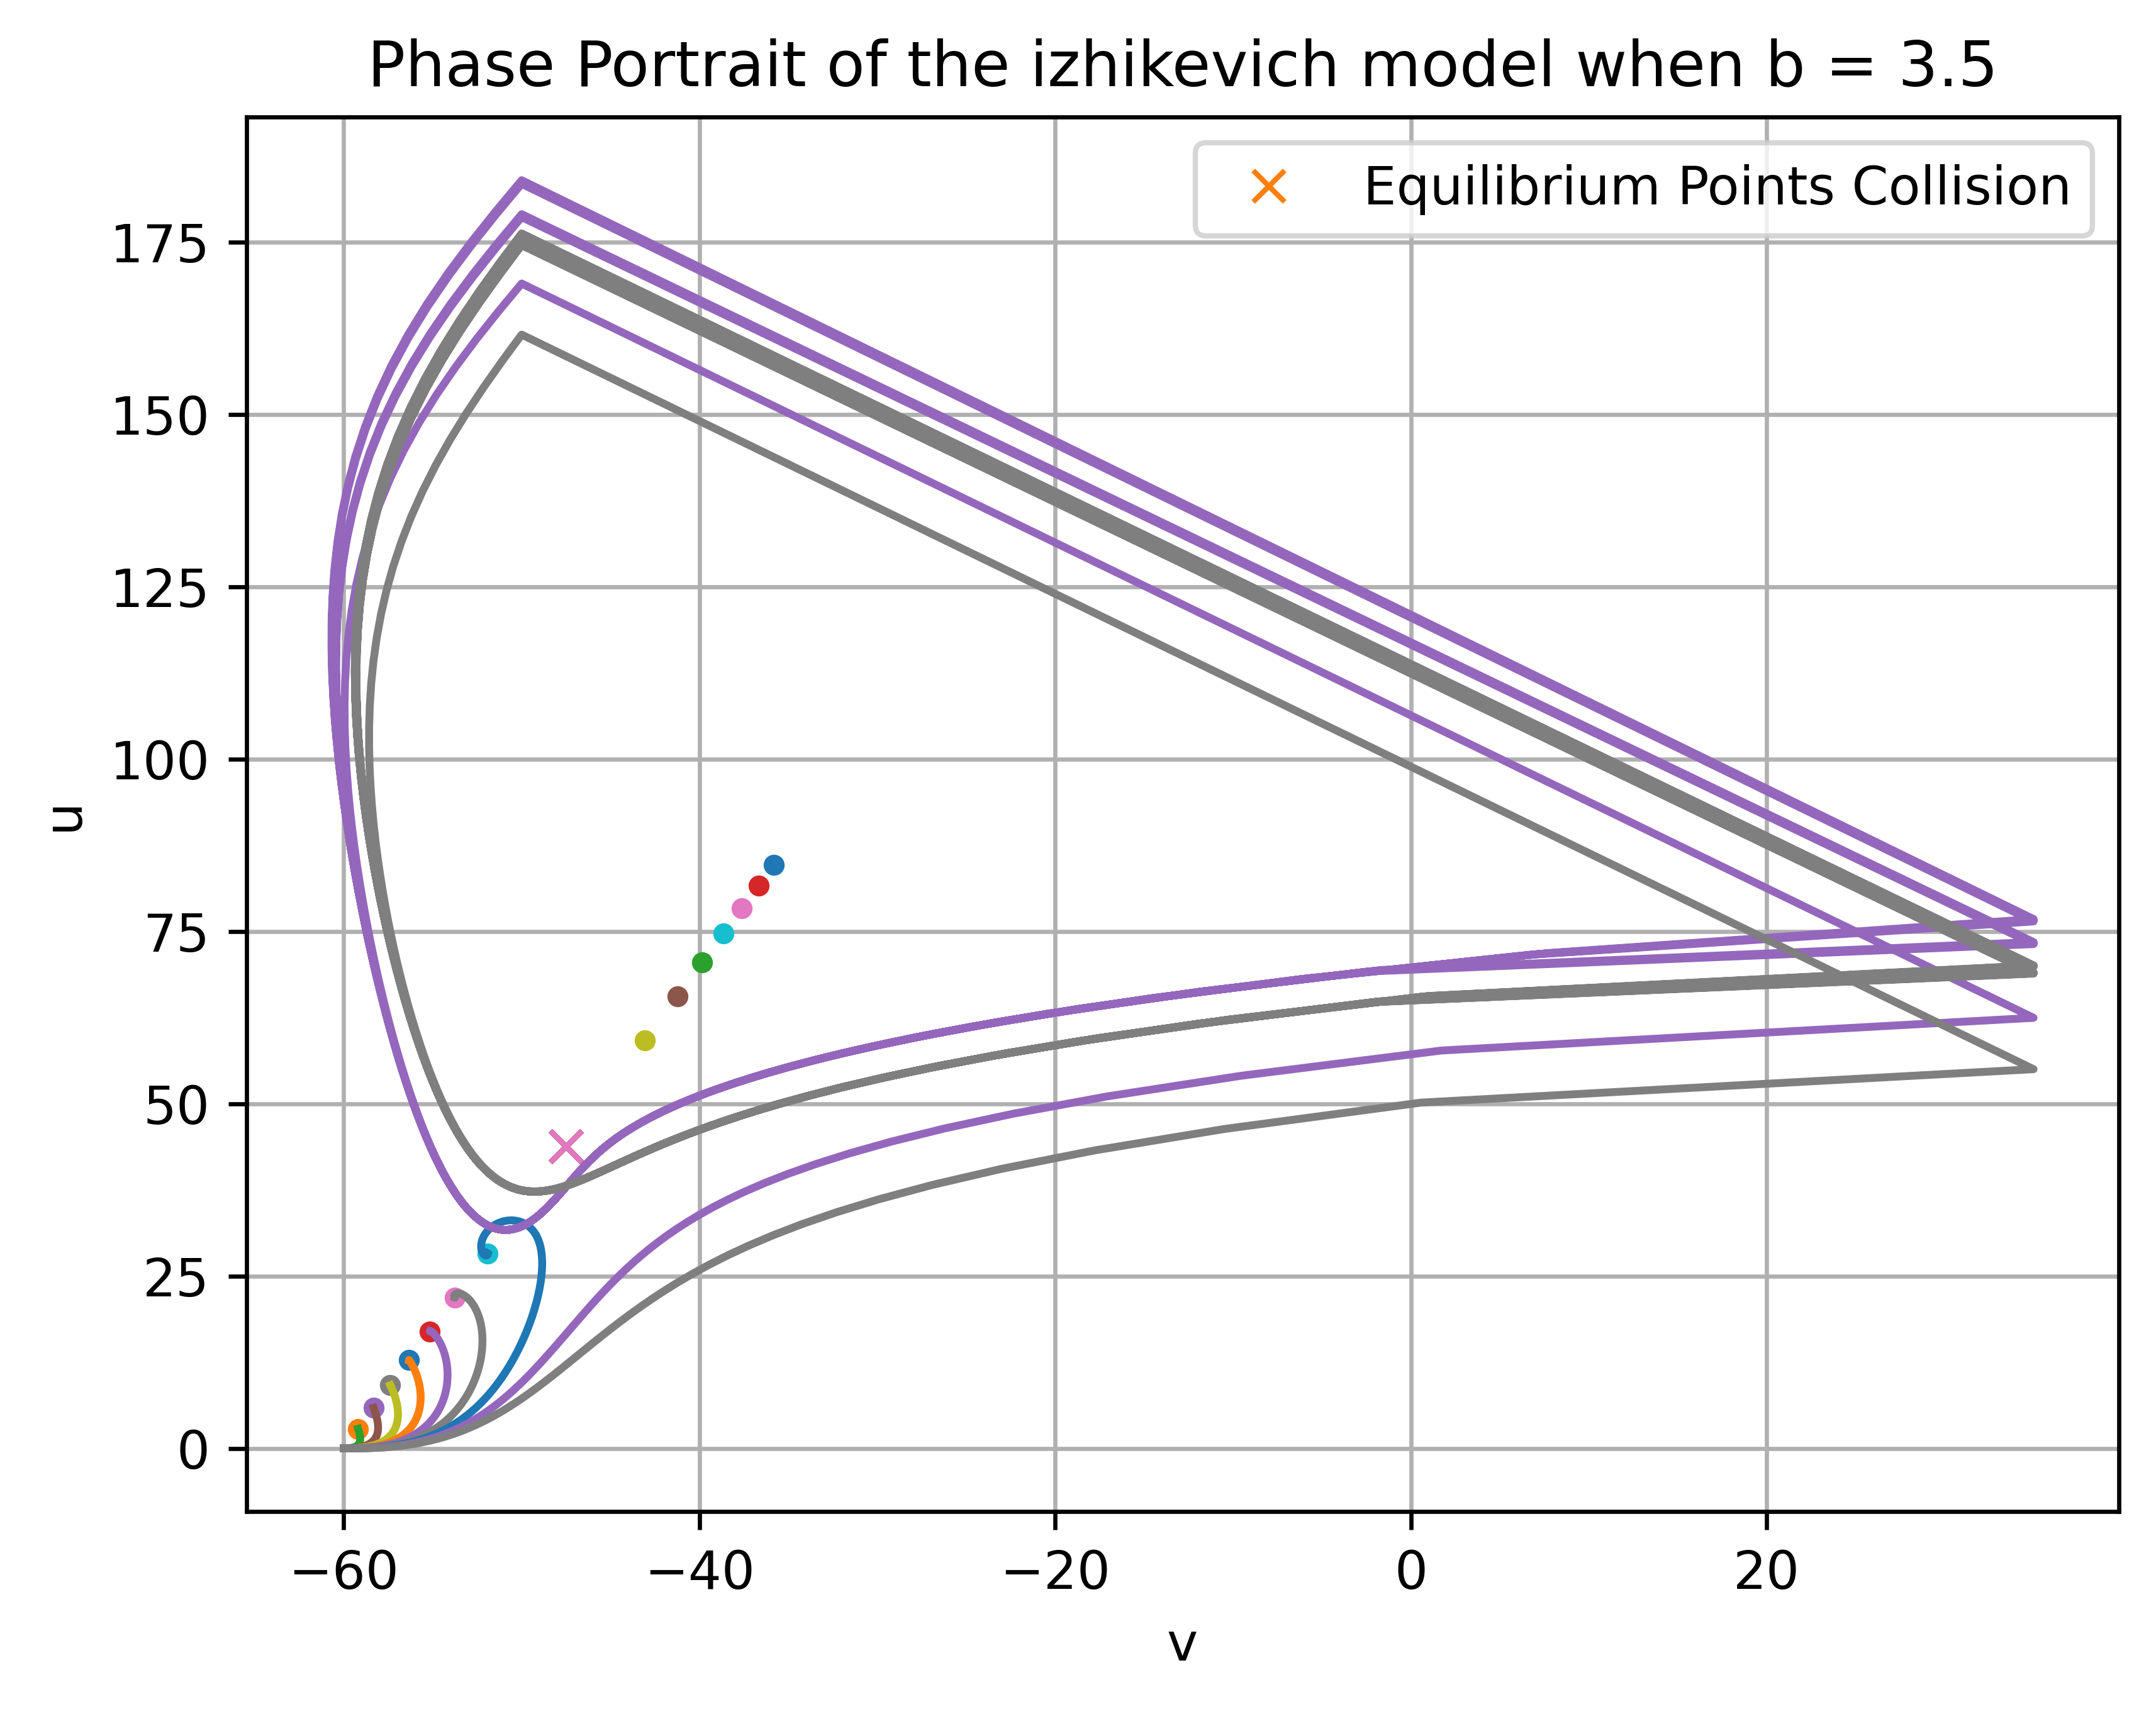

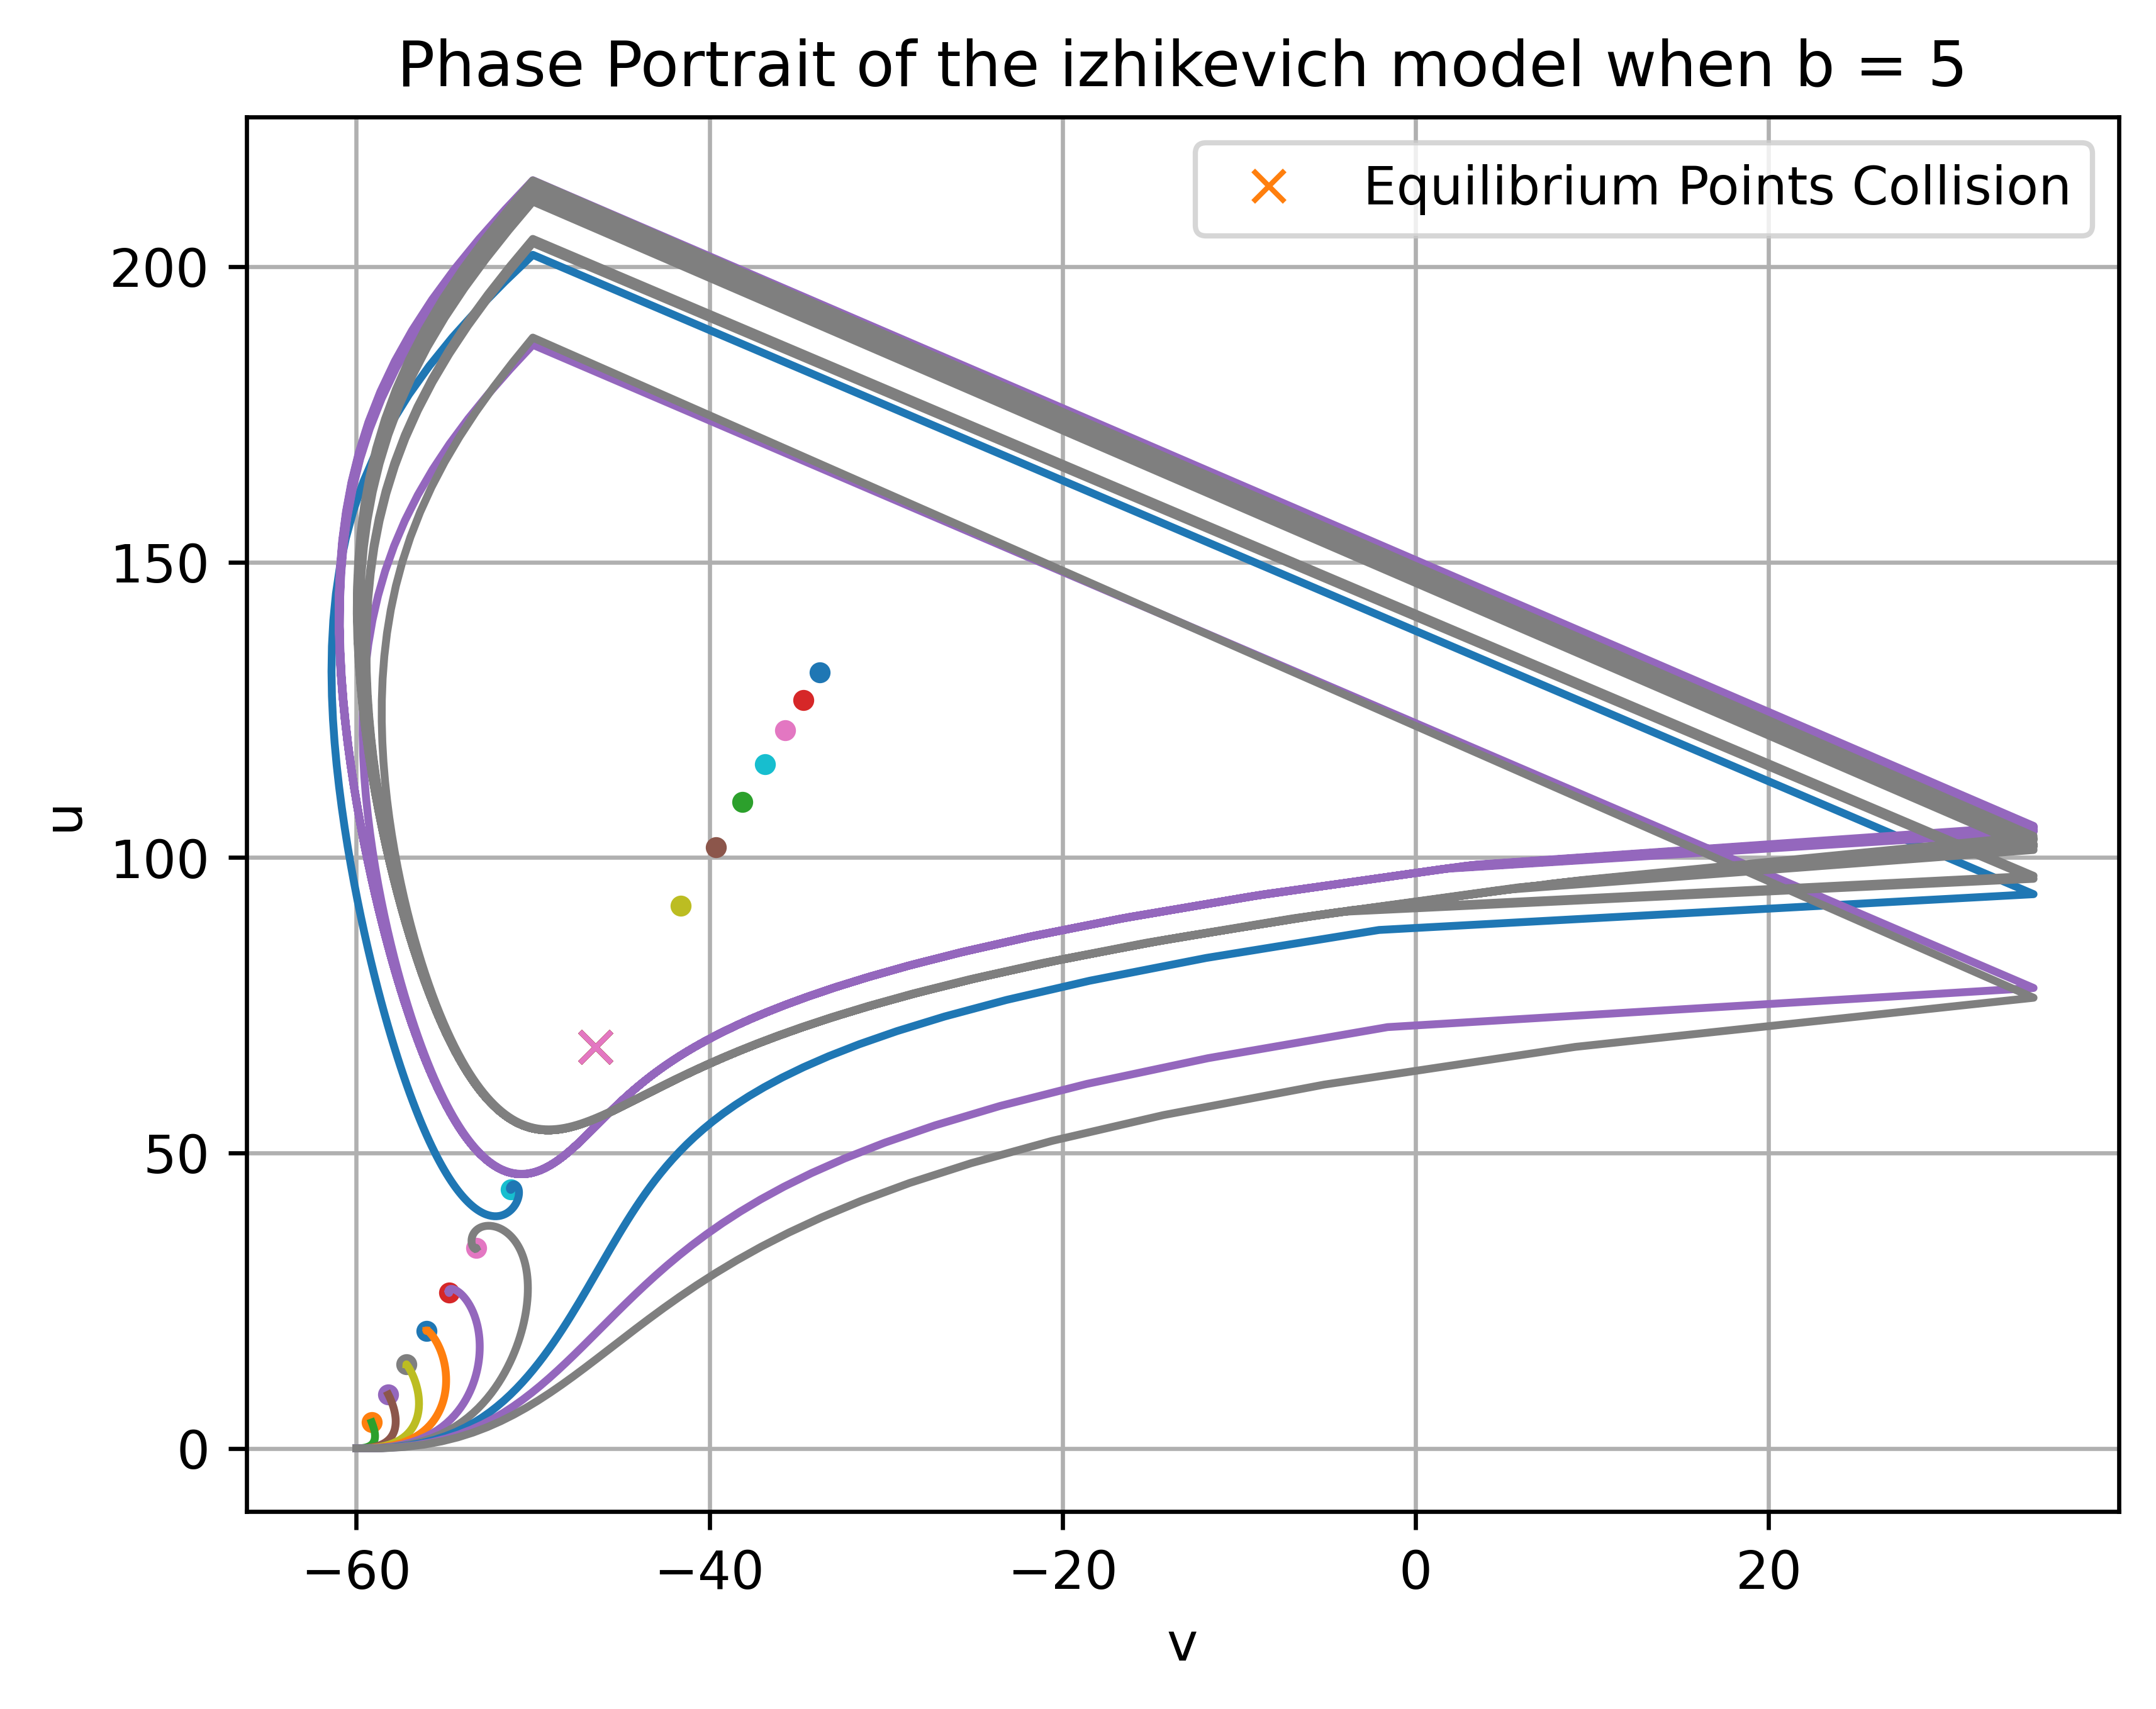

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time


C = 100
k = 0.7
vr = -60
vt = -40
a = 0.03 
b = [-2, 0, 0.5, 2.5, 3, 3.5, 5]
c = -50
d = 100
vpeak = 35


# To create the bifurcation diagram, we update the current I while numerically solving the simple model
I = np.zeros(2000)
h = 1
T = 2000
v = np.zeros(len(I))
u = np.zeros(len(I))
v[0] = vr

# Plotting the cumulated solution plot

for b_j in b:
    I_bi = ((vt - vr)*k + b_j)**2/(4*k)
    if I_bi < 0:
        raise Exception("The injected current is negative")
    for j in range(1, 10):
        I[600:1999] = (j/8)*I_bi
        for i in range(0, T-1):
            v[i+1] = v[i] + (h/C) * (k*(v[i]- vr)*(v[i]-vt) - u[i] + I[i])
            u[i+1] = u[i] + h*a*(b_j*(v[i] - vr) - u[i])
            if v[i+1] >= vpeak:
                v[i] = vpeak
                v[i+1] = c
                u[i+1] = u[i+1] + d
        # Equilibrium points
        radicand = (vr-vt)**2 * k**2 + (-2*vr*b_j+2*b_j*vt-4*(I[900]))*k + (b_j)**2

        if abs(radicand) < 10 ** -8:
            radicand = 0
            marker_type = 'x'
            marker_size = 6
            v_eq1 = (k*vt + k*vr + b_j + np.sqrt(radicand))/(2*k)
            u_eq1 = b_j*(v_eq1 - vr)
            v_eq2 = (k*vt + k*vr + b_j  - np.sqrt(radicand))/(2*k)
            u_eq2 = b_j*(v_eq2 - vr)
            plt.plot(v_eq1, u_eq1, marker_type, markersize = marker_size, label="Equilibrium Points Collision")
            plt.legend(loc = 'upper right')
            print(f"For b = {b_j}, when I = {I[900]}, the Equilibrium Points collide!")
        elif radicand < 0:
            pass
        else:
            marker_type = 'o'
            marker_size = 3
            v_eq1 = (k*vt + k*vr + b_j + np.sqrt(radicand))/(2*k)
            u_eq1 = b_j*(v_eq1 - vr)
            v_eq2 = (k*vt + k*vr + b_j  - np.sqrt(radicand))/(2*k)
            u_eq2 = b_j*(v_eq2 - vr)
        if j == 1:
            plt.figure(dpi = 600)
        plt.title(f"b=%f" % b_j)
        plt.xlabel('v')
        plt.ylabel('u')
        plt.plot(v_eq1, u_eq1,marker_type, markersize = marker_size)
        plt.plot(v_eq2, u_eq2,marker_type, markersize = marker_size)
        plt.plot(v, u)
        plt.title(f"Phase Portrait of the izhikevich model when b = {b_j}")
        plt.grid()
        plt.savefig(f'When b = {b_j}.png')  # You can specify the file format by changing the extension

For b = -2, when I = 51.42857142857143, the Equilibrium Points collide!
For b = 0, when I = 70.0, the Equilibrium Points collide!
For b = 0.5, when I = 75.08928571428572, the Equilibrium Points collide!
For b = 3, when I = 103.21428571428572, the Equilibrium Points collide!
For b = 5, when I = 128.92857142857144, the Equilibrium Points collide!


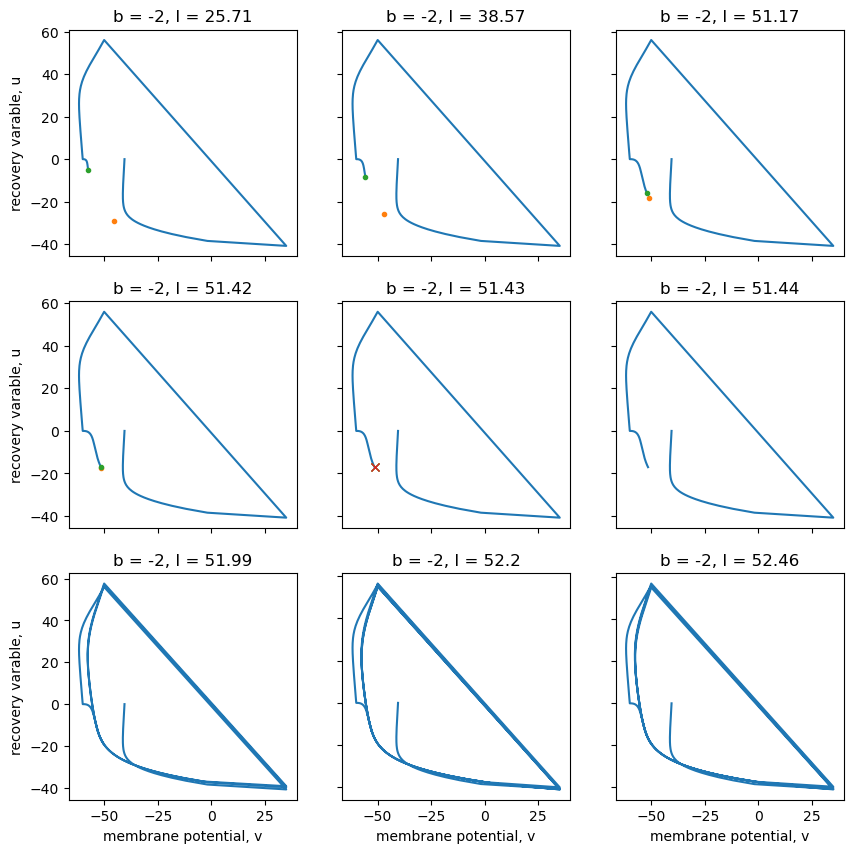

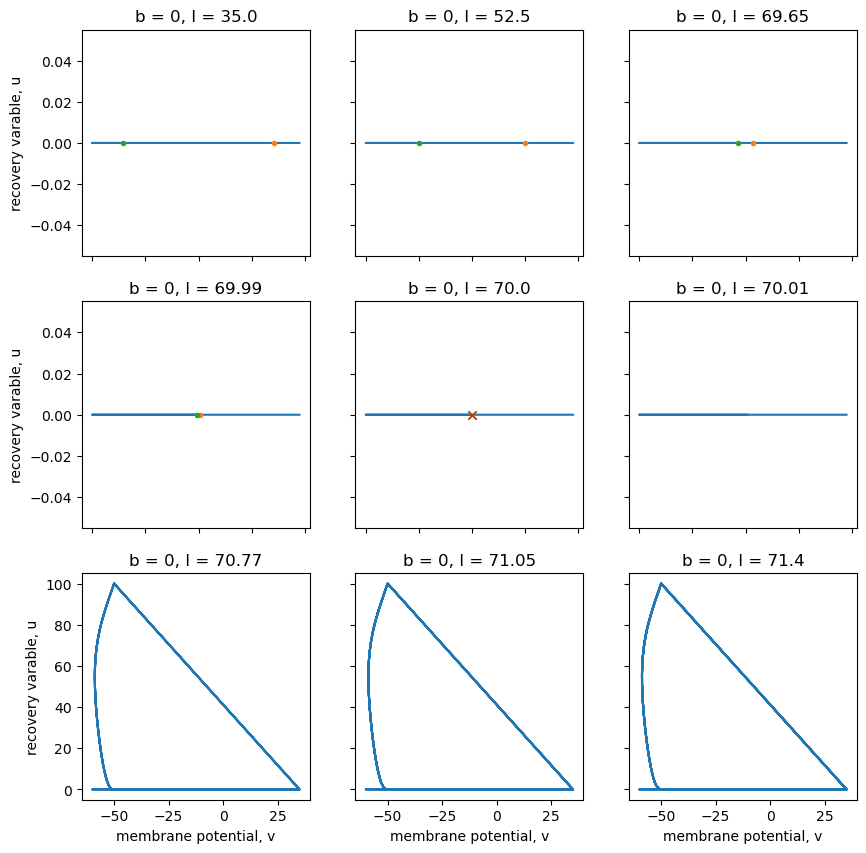

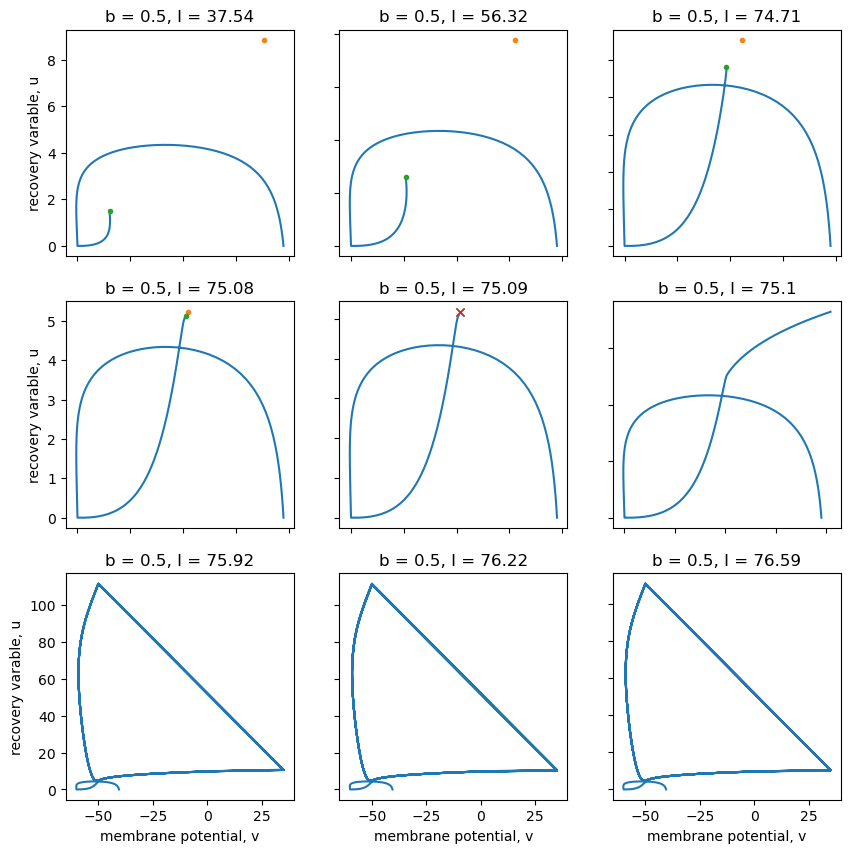

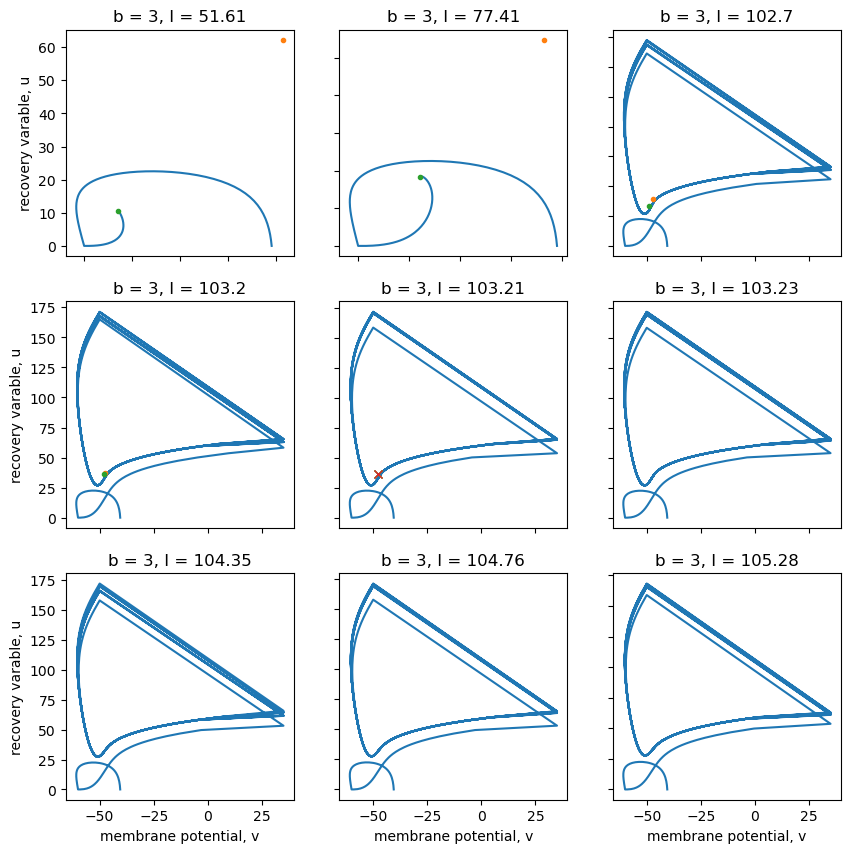

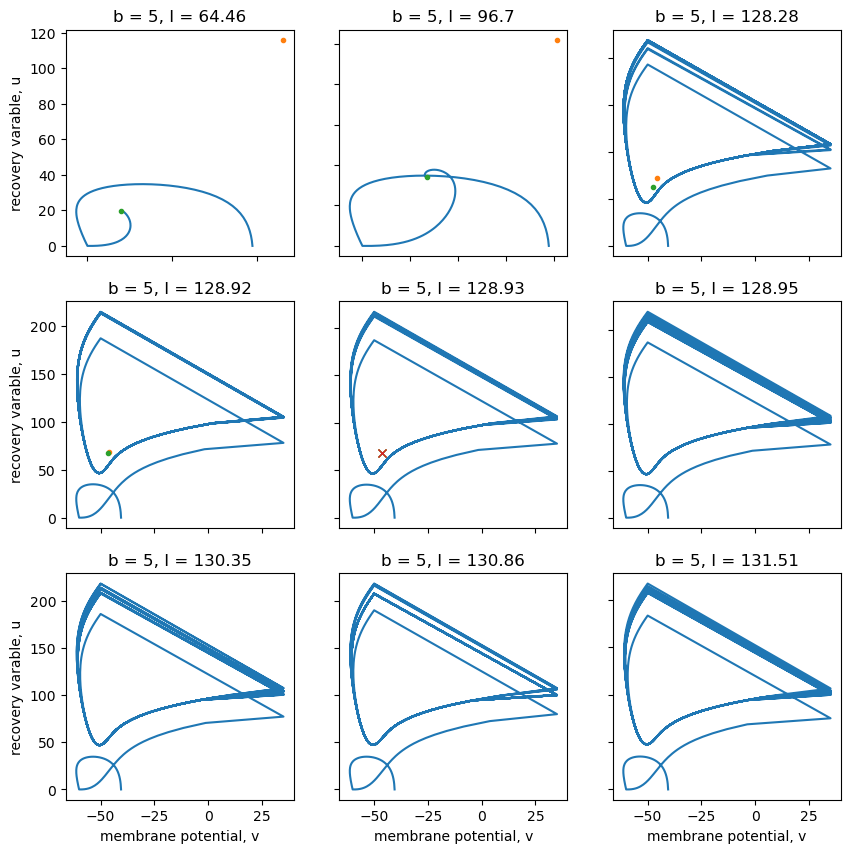

In [11]:
import numpy as np
import matplotlib.pyplot as plt

C = 100
k = 0.7
vr = -60
vt = -40
a = 0.03 
b = [-2, 0, 0.5, 3, 5]
c = -50
d = 100
vpeak = 35


# To create the bifurcation diagram, we update the current I while numerically solving the simple model
T = 3000
I = np.zeros(T)
h = 1
current_multiplier = [0.5, 0.75, 0.995,0.9999, 1.0, 1.0002, 1.011, 1.015, 1.02]


def phase_plane(b):
    '''
    phase_plane:we vary the parameter I to study the process of bifurcation, and we plot the phase 
                plane for various I on separate graphs to distinguish which bifurcation type
                they belong to 
    b: an array of floats
    Return None
    '''
    for b_j in b:
        I_bi = ((vt - vr)*k + b_j)**2/(4*k)
        if I_bi < 0:
            raise Exception("The injected current is negative")
            break
        fig, axes = plt.subplots(3, 3, figsize=(10, 10))
        for ax in axes.flat:
            ax.set(xlabel='membrane potential, v', ylabel='recovery varable, u')

        # Hide x labels and tick labels for top plots and y ticks for right plots.
        for ax in axes.flat:
            ax.label_outer()
        for j in range(1, 10):
            I[600:2999] = (current_multiplier[j-1])*I_bi
            if j % 3 != 0:
                col_pos = (j % 3) - 1
                if j % 3 == 1:
                    row_pos = (j + 2) % 3 + j //3
                else:
                    row_pos = (j + 1) % 3 + j//3
            else:
                col_pos = 2
                row_pos = j // 3 - 1     
            v = np.zeros(T)
            u = np.zeros(T)
            # Important! The initial condition does play an important role
            # in forming the invariant circle. Wow! I never thought about this
            # When the initial condition is -50, we have a Poisson
            v[0] = -40.5
            u[0] = 0
            for i in range(0, T-1):
                v[i+1] = v[i] + (h/C) * (k*(v[i]- vr)*(v[i]-vt) - u[i] + I[i])
                u[i+1] = u[i] + h*a*(b_j*(v[i] - vr) - u[i])
                if v[i+1] >= vpeak:
                    v[i] = vpeak
                    v[i+1] = c
                    u[i+1] = u[i+1] + d
            # Equilibrium points
            axes[row_pos, col_pos].plot(v, u)
            axes[row_pos, col_pos].set_title(f'b = {b_j}, I = {round(I[900], 2)}')
            radicand = (vr-vt)**2 * k**2 + (-2*vr*b_j+2*b_j*vt-4*(I[900]))*k + (b_j)**2
            if abs(radicand) < 10 ** -8:
                marker_type = 'x'
                marker_size = 6
                v_eq1 = (k*vt + k*vr + b_j)/(2*k)
                u_eq1 = b_j*(v_eq1 - vr)
                v_eq2 = (k*vt + k*vr + b_j)/(2*k)
                u_eq2 = b_j*(v_eq2 - vr)
                axes[row_pos, col_pos].plot(v_eq1, u_eq1, marker_type, markersize = marker_size, label="Equilibrium Points Collision")
                print(f"For b = {b_j}, when I = {I[900]}, the Equilibrium Points collide!")
            elif radicand < 0:
                continue
            else:
                marker_type = 'o'
                marker_size = 3
                v_eq1 = (k*vt + k*vr + b_j + np.sqrt(radicand))/(2*k)
                u_eq1 = b_j*(v_eq1 - vr)
                v_eq2 = (k*vt + k*vr + b_j  - np.sqrt(radicand))/(2*k)
                u_eq2 = b_j*(v_eq2 - vr)
            axes[row_pos, col_pos].plot(v_eq1, u_eq1, marker_type, markersize = marker_size)
            axes[row_pos, col_pos].plot(v_eq2, u_eq2, marker_type, markersize = marker_size)
        plt.savefig(f'b = {b_j} grid.png', dpi=600, bbox_inches='tight')
    return None

plot = phase_plane(b)


$\textbf{Useful trick:}$ For $$A = \begin{bmatrix}a_{11}&a_{12} \\ a_{21} & a_{22}\\\end{bmatrix}$$, it will have eigenvalues of the form 
$$\lambda_{1,2} = \dfrac{tr(A) \pm \sqrt{tr(A)^2 - 4det(A)}}{2}$$
If $tr(A)^2 < 4Det(A)$, then we have complex conjugate eigenvalues.<br>
Furthermore, if $tr(A) < 0$, then we will have stable equilibrium.<br>
When we want negative eigenvalues, if $det(A) > 0 \text{ and }  tr(A) < 0$, then 
\begin{align*}
-4det(A) &< 0 \\
tr(A)^2 - 4det(A) &< tr(A)^2 \\
\sqrt{tr(A)^2 - 4det(A)} &< tr(A) < 0\\
\end{align*}
then we have negative eigenvalues 